# **Business Case Walmart - Confidence Interval and CLT**

---



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import norm

<u>**NumPy:**</u>

* NumPy is a powerful numerical computing library in Python.

<u>**Pandas:**</u>

* Pandas is a data manipulation and analysis library for Python

<u>**Seaborn:**</u>

* Seaborn is a statistical data visualization library based on Matplotlib.

<u>**Matplotlib:**</u>

* Matplotlib is a 2D plotting library for creating static, animated, and interactive visualizations in Python.

<u>**WorldCloud:**</u>

* WordCloud is a Python library used for creating word clouds, which are visual representations of text data.

**These libraries are often used together in data science and analysis workflows to handle, manipulate, and visualize data effectively.**


# **1. This is formatted as code Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

---



In [ ]:
!gdown '1cbAeW0uTzTn3U9hk29XWTrYR5lzLiGl6'

Downloading...
From: https://drive.google.com/uc?id=1cbAeW0uTzTn3U9hk29XWTrYR5lzLiGl6
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 57.5MB/s]


In [ ]:
df=pd.read_csv('walmart_data.csv')
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

* #  The data type of all columns in the “customers” table

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# <u>**Insights**</u>

*   The data type of all columns in the table.

# <u>**Recommendations**</u>

*   We want to display the data type of each column present in the
dataset.
*   We can see 2 Type of Data types.

# <u>**Assumptions**</u>

* <u>Object</u>- Holds addresses that refer to objects. You can assign any reference type (string, array, class, or interface) to an Object variable. An Object variable can also refer to data of any value type (numeric, Boolean, Char, Date, structure, or enumeration).
* <u>Int64</u>- The type int64 tells us that Python is storing each value within this column as a 64 bit integer. Holds signed 64-bit (8-byte) integers that range in value from -9223372036854775808 to 9223372036854775807.

* # You can find the number of rows and columns given in the dataset

In [ ]:
df.shape

(550068, 10)

# <u>**Insights**</u>

*   You can find the number of rows and columns given in the dataset

# <u>**Recommendations**</u>

*   We want to find the shape of the dataset. We can use .shape

# <u>**Assumptions**</u>

*   Data contain 10 columns And 550068 rows.

* # Check for the missing values and find the number of missing values in each column

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.isnull().sum().any()

False

# <u>**Insights**</u>

*   Check for the missing values and find the number of missing values in each
column

# <u>**Recommendations**</u>

*   We want to find any null values in columns, we can use .info()

# <u>**Assumptions**</u>

*   Data have NO NULL values in any columns.
*   All the 10 columns have 550068 non-null values and we know from ABOVE there is 550068 rows. So, therefore there no null in Table


In [ ]:
columns=['User_ID',"Product_ID","Gender","Age","Occupation",'City_Category','Marital_Status','Product_Category']
for cat in columns:
    print('unique',cat,':-',df[cat].nunique())

unique User_ID :- 5891
unique Product_ID :- 3631
unique Gender :- 2
unique Age :- 7
unique Occupation :- 21
unique City_Category :- 3
unique Marital_Status :- 2
unique Product_Category :- 20


* Observation: **Unique values in each Column**
  * unique User_ID :- 5891
  * unique Product_ID :- 3631
  * unique Gender :- 2
  * unique Age :- 7
  * unique Occupation :- 21
  * unique City_Category :- 3
  * unique Marital_Status :- 2
  * unique Product_Category :- 20

# Top 10 Products

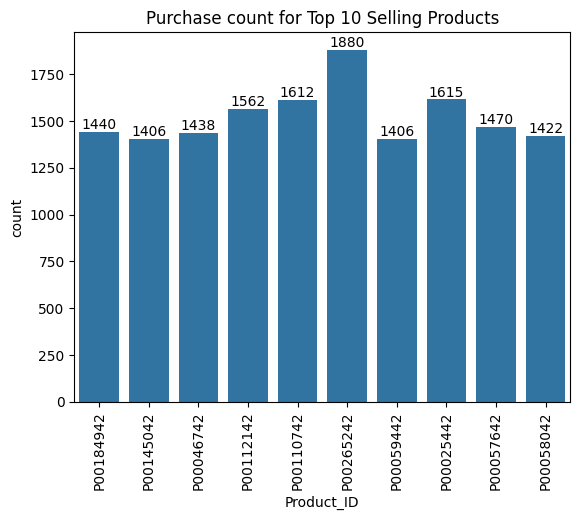

In [ ]:
top_10_products = df[df['Product_ID'].isin(list(df['Product_ID'].value_counts()[:10].index))]
ax=sns.countplot(data=top_10_products, x='Product_ID')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Purchase count for Top 10 Selling Products")
plt.show()

# Gender wise Unique Count

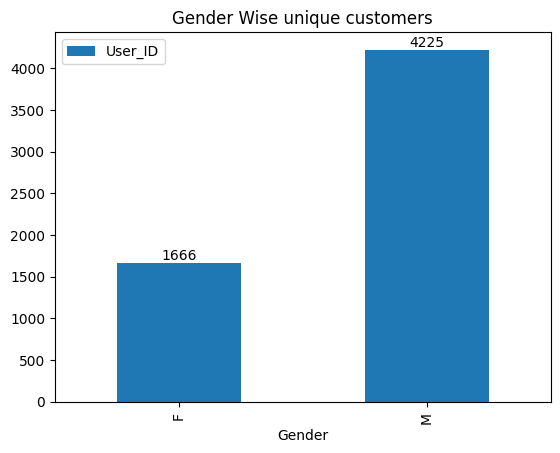

In [ ]:
df_gender = df.groupby('Gender')['User_ID'].nunique().reset_index()
ax=df_gender.sort_values(by='User_ID',ascending=True).plot(kind='bar',x='Gender',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Gender Wise unique customers")
plt.show()

* Observations:
  * **4225 Males** in Dataset.
  * **1666 Females** in Dataset.

# Age group wise Unique Count

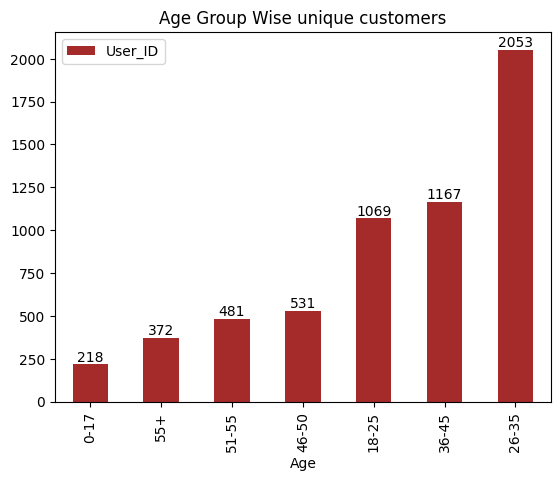

In [ ]:
df_age = df.groupby('Age')['User_ID'].nunique().reset_index()
ax= df_age.sort_values(by='User_ID',ascending=True).plot(kind='bar',x='Age',y='User_ID',color='brown')
ax.bar_label(ax.containers[0])
plt.title("Age Group Wise unique customers")
plt.show()

* Observations:
  * **26-35** Age groups have made highest purchase, followed by **36-45**, and **18-25**

# Occupation wise Unique Count

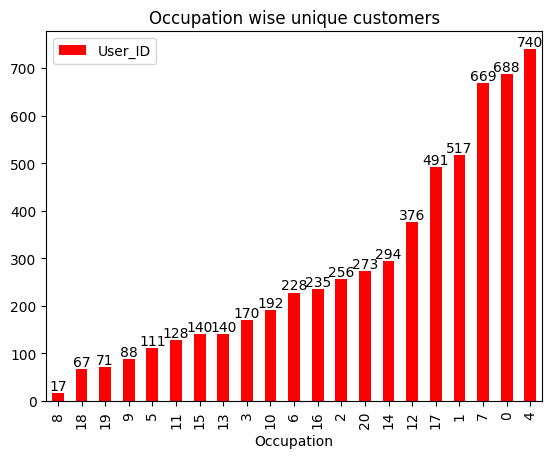

In [ ]:
df_occupation = df.groupby('Occupation')['User_ID'].nunique().reset_index()
ax= df_occupation.sort_values(by='User_ID',ascending=True).plot(kind='bar',x='Occupation',y='User_ID', color='red')
ax.bar_label(ax.containers[0])
plt.title("Occupation wise unique customers")
plt.show()

* Observations:
  * **Occupations are masked with IDs**.
  * **Occupation 4** made highest purchase in Dataset.
  * **Occupation 8** made lowest purchase in Dataset.

# Customer City wise Unique count

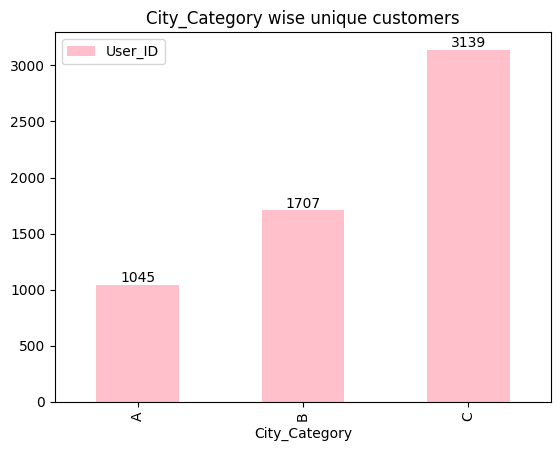

In [ ]:
df_occupation = df.groupby('City_Category')['User_ID'].nunique().reset_index()
ax = df_occupation.sort_values(by='User_ID',ascending=True).plot(kind='bar',x='City_Category',y='User_ID', color='pink')
ax.bar_label(ax.containers[0])
plt.title("City_Category wise unique customers")
plt.show()

* Observations:
  * Most Customers are ordering from **City C (3139 Unique Customer)**
  * Second is **City B (1707 Unique Customer)**
  * At last is **City A (1045 Unique Customer)**

# Marital_Status wise Unique Count

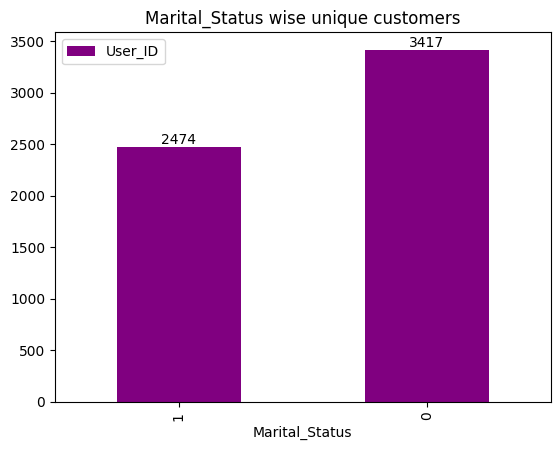

In [ ]:
df_marital = df.groupby('Marital_Status')['User_ID'].nunique().reset_index()
ax = df_marital.sort_values(by='User_ID',ascending=True).plot(kind='bar',x='Marital_Status',y='User_ID', color='purple')
ax.bar_label(ax.containers[0])
plt.title("Marital_Status wise unique customers")
plt.show()

* Observations:
  * **3417** Customers are **Not Married**.
  * **2474** Customers are **Married**.

# Product Categories wise Unique Count of Product IDs

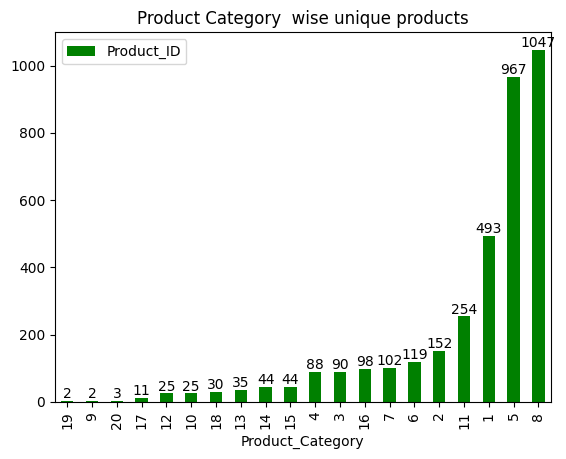

In [ ]:
df_product_cat = df.groupby('Product_Category')['Product_ID'].nunique().reset_index()
ax = df_product_cat.sort_values(by='Product_ID',ascending=True).plot(kind='bar',x='Product_Category',y='Product_ID', color='green')
ax.bar_label(ax.containers[0])
plt.title("Product Category  wise unique products")
plt.show()

In [ ]:
k=df['Product_ID'].unique()
len(k)

3631

In [ ]:
tot=0
for x in range(1,21):
  q=df[df['Product_Category']==x]['Product_ID']
  q1=q.unique()
  print('Unique Product_IDs in',x,'Product_Category:-',len(q1))
  tot+=len(q1)
print('Total unique Product_ID:-',tot)

Unique Product_IDs in 1 Product_Category:- 493
Unique Product_IDs in 2 Product_Category:- 152
Unique Product_IDs in 3 Product_Category:- 90
Unique Product_IDs in 4 Product_Category:- 88
Unique Product_IDs in 5 Product_Category:- 967
Unique Product_IDs in 6 Product_Category:- 119
Unique Product_IDs in 7 Product_Category:- 102
Unique Product_IDs in 8 Product_Category:- 1047
Unique Product_IDs in 9 Product_Category:- 2
Unique Product_IDs in 10 Product_Category:- 25
Unique Product_IDs in 11 Product_Category:- 254
Unique Product_IDs in 12 Product_Category:- 25
Unique Product_IDs in 13 Product_Category:- 35
Unique Product_IDs in 14 Product_Category:- 44
Unique Product_IDs in 15 Product_Category:- 44
Unique Product_IDs in 16 Product_Category:- 98
Unique Product_IDs in 17 Product_Category:- 11
Unique Product_IDs in 18 Product_Category:- 30
Unique Product_IDs in 19 Product_Category:- 2
Unique Product_IDs in 20 Product_Category:- 3
Total unique Product_ID:- 3631


* Observations:
  * Most selling Product category is **Product category 8**.
  * Second is **Product category 5**.
  * Third is **Product category 1**.

# **2. Detect outliers**

---



In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

* # Find the outliers for every continuous variable in the dataset

# Column:- Purchase

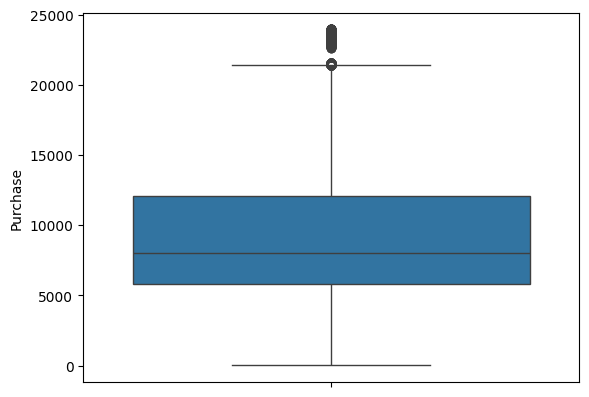

In [ ]:
sns.boxplot(df,y= df["Purchase"])
plt.show()

In [ ]:
Q3 = np.percentile(df["Purchase"], 75)
Q1 = np.percentile(df["Purchase"], 25)
iqr_Purchase = Q3 - Q1
iqr_Purchase

6231.0

In [ ]:
upper = Q3 + 1.5*iqr_Purchase
x= (df["Purchase"]>upper).sum()
print('No. of outliers in Purchase Column:',x,'Percentage of ounliers:',round((x/550068)*100,2),"%")

No. of outliers in Purchase Column: 2677 Percentage of ounliers: 0.49 %


* Observation:
  * Some outliers in column Purchase.
  * OTHER Columns have no outliers.

* # Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

# Column:- Purchase

In [ ]:
df['Purchase'].min()

12

In [ ]:
df['Purchase'].max()

23961

In [ ]:
df_new=df
Q95 = np.percentile(df_new["Purchase"], 95)
Q5 = np.percentile(df_new["Purchase"], 5)
print('Purchase 5 Percentile:',Q5,'& 95 Percentile',Q95)

Purchase 5 Percentile: 1984.0 & 95 Percentile 19336.0


* Obsevation:
  * We see some outliers in the purchase column. But we cannot clip the data.
  * Clipping will destroy the dataset, **as we see the minimum value is 12 and the maximum value is 23961. By clipping all data from 12 to 1984, it will all become 1984, and 19336 to 23961 will become 19336.**
  * This will create the **wrong results**.

# Analysis on Purchase Column

In [ ]:
df_unique = df.groupby('User_ID')['Purchase'].sum().reset_index()

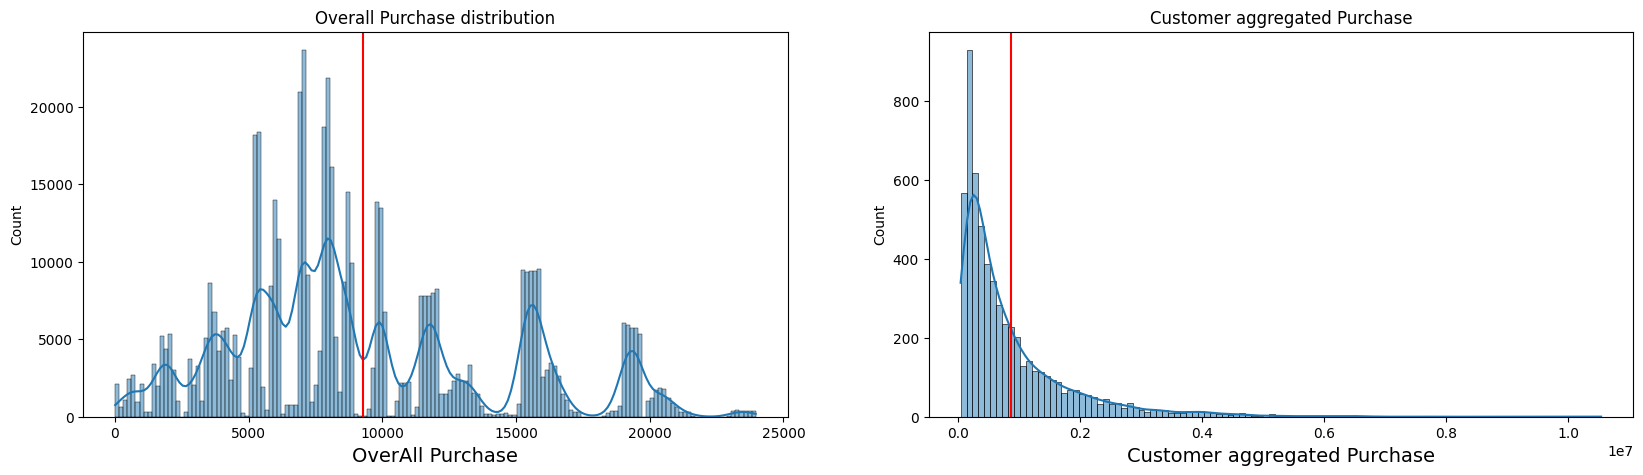

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Purchase'],kde = True)
plt.axvline((df["Purchase"]).mean(),color="red")
plt.xlabel('OverAll Purchase',fontsize=14)
plt.title("Overall Purchase distribution")
plt.subplot(1, 2, 2)
sns.histplot(df_unique['Purchase'],kde = True)
plt.axvline((df_unique["Purchase"]).mean(),color="red")
plt.xlabel('Customer aggregated Purchase',fontsize=14)
plt.title("Customer aggregated Purchase")
plt.show()

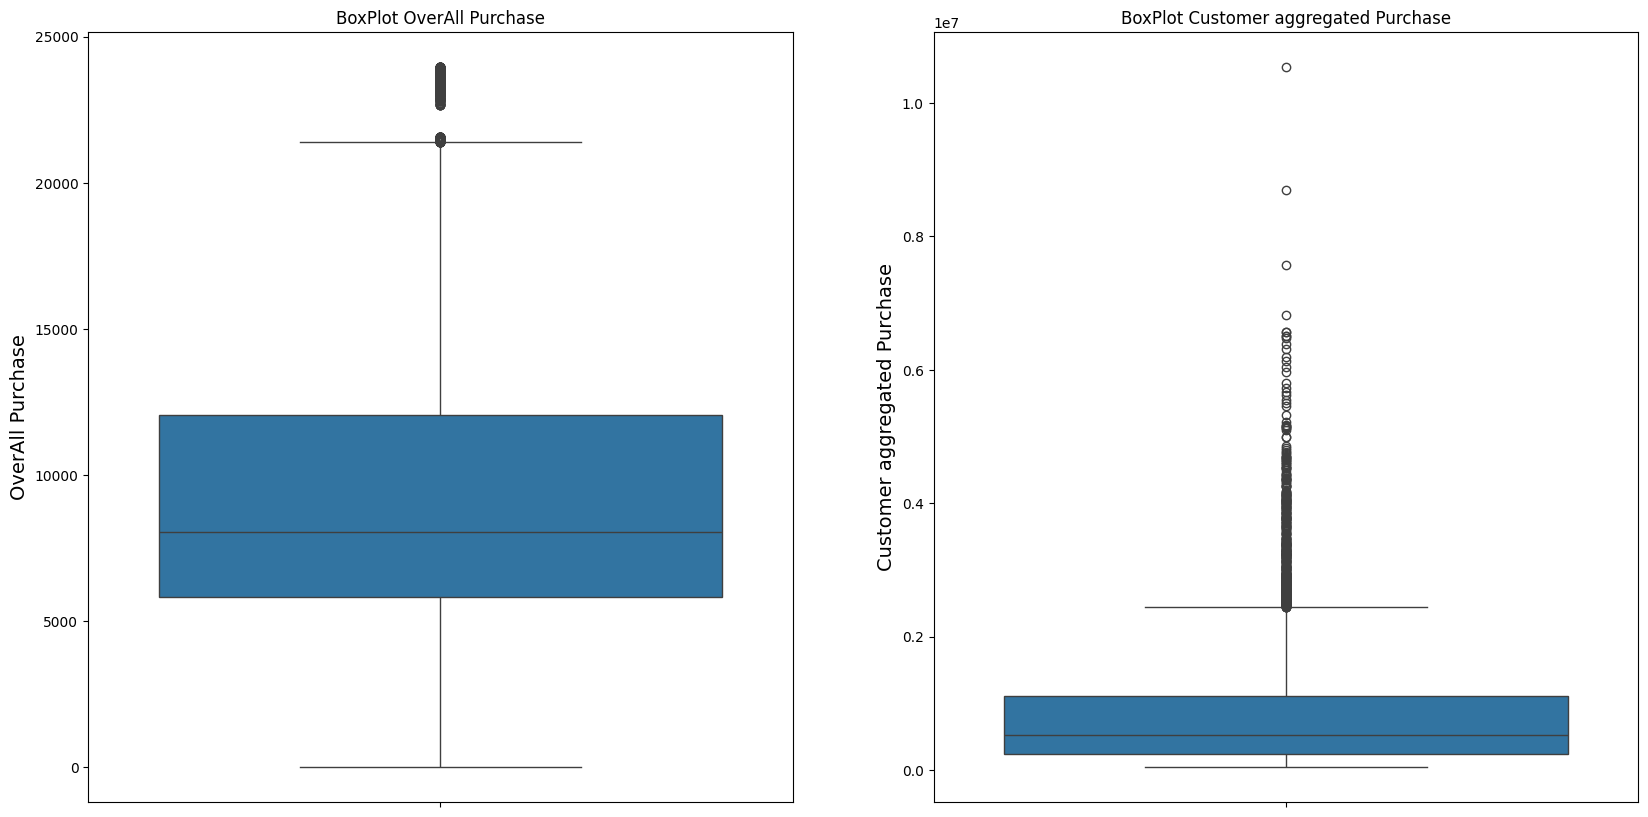

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(df, y='Purchase')
plt.ylabel('OverAll Purchase',fontsize=14)
plt.title("BoxPlot OverAll Purchase")
plt.subplot(1, 2, 2)
sns.boxplot(df_unique, y='Purchase')
plt.ylabel('Customer aggregated Purchase',fontsize=14)
plt.title("BoxPlot Customer aggregated Purchase")
plt.show()

* Observations:

  * If we see overall distribution of p**urchase amount** it's **slightly similar to normal distribution.**
  * If we see **Purchase aggregated on Customer** and plot the distribution we can see pattern that **distribution follows long right tail**.
  * **Very few customers** are **total aggregated purchase > 4 millions**.
  * **Most customers** have spend < **2 millions**.

# **3. Data Exploration**

---



In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

# User wise **Total Purchase Amount**

In [ ]:
df_user = df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status','Purchase']].groupby(['User_ID',
        'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status'])['Purchase'].sum().reset_index()
df_user.head(15)

User_ID Gender    Age  Occupation City_Category  \
0   1000001      F   0-17          10             A   
1   1000002      M    55+          16             C   
2   1000003      M  26-35          15             A   
3   1000004      M  46-50           7             B   
4   1000005      M  26-35          20             A   
5   1000006      F  51-55           9             A   
6   1000007      M  36-45           1             B   
7   1000008      M  26-35          12             C   
8   1000009      M  26-35          17             C   
9   1000010      F  36-45           1             B   
10  1000011      F  26-35           1             C   
11  1000012      M  26-35          12             C   
12  1000013      M  46-50           1             C   
13  1000014      M  36-45           0             C   
14  1000015      M  26-35           7             A   

   Stay_In_Current_City_Years  Marital_Status  Purchase  
0                           2               0    334093  
1                          4+               0    810472  
2                           3               0    341635  
3                           2               1    206468  
4                           1               1    821001  
5                           1               0    379930  
6                           1               1    234668  
7                          4+               1    796593  
8                           0               0    594099  
9                          4+               1   2169510  
10                          1               0    557023  
11                          2               0    120801  
12                          3               1    713927  
13                          0               0    127629  
14                          1               0   1047728

# **User's per product category** wise Total Purchase Amount

In [ ]:
df_user_product = df[['User_ID','Product_Category', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']].groupby(['User_ID','Product_Category', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years','Marital_Status'])['Purchase'].sum().reset_index()
df_user_product.head(15)

User_ID  Product_Category Gender   Age  Occupation City_Category  \
0   1000001                 1      F  0-17          10             A   
1   1000001                 2      F  0-17          10             A   
2   1000001                 3      F  0-17          10             A   
3   1000001                 4      F  0-17          10             A   
4   1000001                 5      F  0-17          10             A   
5   1000001                 6      F  0-17          10             A   
6   1000001                 8      F  0-17          10             A   
7   1000001                12      F  0-17          10             A   
8   1000001                14      F  0-17          10             A   
9   1000001                16      F  0-17          10             A   
10  1000001                20      F  0-17          10             A   
11  1000002                 1      M   55+          16             C   
12  1000002                 2      M   55+          16             C   
13  1000002                 5      M   55+          16             C   
14  1000002                 6      M   55+          16             C   

   Stay_In_Current_City_Years  Marital_Status  Purchase  
0                           2               0     61604  
1                           2               0     12842  
2                           2               0    119859  
3                           2               0      5612  
4                           2               0     15749  
5                           2               0     16622  
6                           2               0     69542  
7                           2               0      4194  
8                           2               0     11011  
9                           2               0     16446  
10                          2               0       612  
11                         4+               0    413669  
12                         4+               0     15870  
13                         4+               0     80490  
14                         4+               0     89995

* # What products are different age groups buying?

In [ ]:
df_age_product = df_user_product.groupby(['Age','Product_Category'])['User_ID'].nunique().reset_index()
Age_wise_max_product_category_count = df_age_product.groupby('Age')['User_ID'].max().reset_index()
df_age_product.merge(Age_wise_max_product_category_count, on=['Age','User_ID'])

Age  Product_Category  User_ID
0   0-17                 1      211
1  18-25                 1     1053
2  26-35                 5     2021
3  36-45                 1     1145
4  46-50                 8      517
5  51-55                 1      472
6    55+                 1      357

* Observations
  * Age Group **0-17** buying **Product category 1** most with **211 unique user** buying this product category.
  * Age Group **18-25** buying **Product category 1** most with **1053 unique user** buying this product category.
  * Age Group **26-35** buying **Product category 5** most with **2021 unique user** buying this product category.
  * Age Group **36-45** buying **Product category 1** most with **1145 unique user** buying this product category.
  * Age Group **46-50** buying **Product category 8** most with **517 unique user** buying this product category.
  * Age Group **51-55** buying **Product category 1** most with **472 unique user** buying this product category.
  * Age Group **55+** buying **Product category 1** most with **357 unique user** buying this product category.

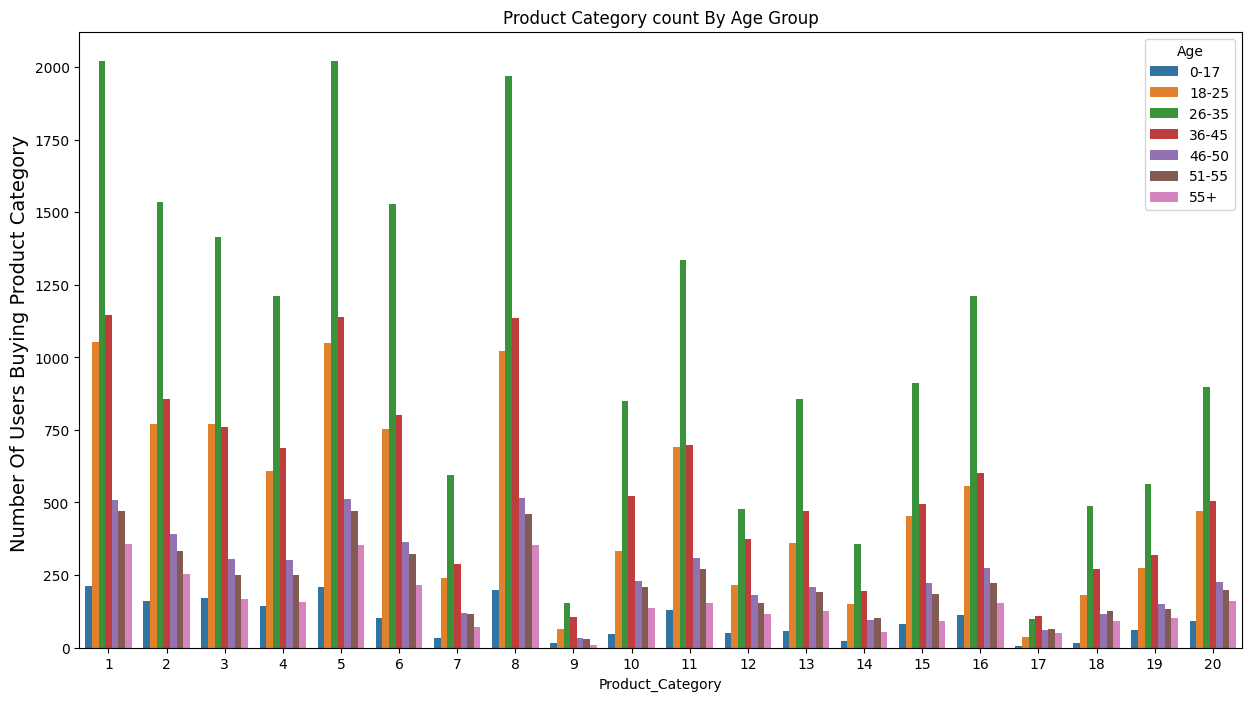

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=df_age_product, x='Product_Category', y='User_ID', hue='Age')
plt.ylabel('Number Of Users Buying Product Category ',fontsize=14)
plt.title("Product Category count By Age Group")
plt.show()

# Age Group:- 0-17

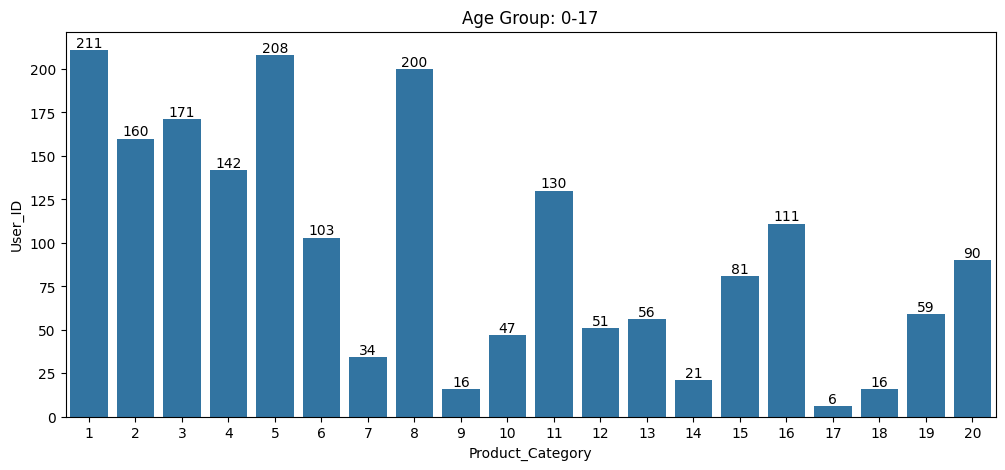

In [ ]:
df_age1=df_age_product[df_age_product['Age']=='0-17']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age1,x=df_age1['Product_Category'],y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 0-17")
plt.show()

# Age Group:- 18-25

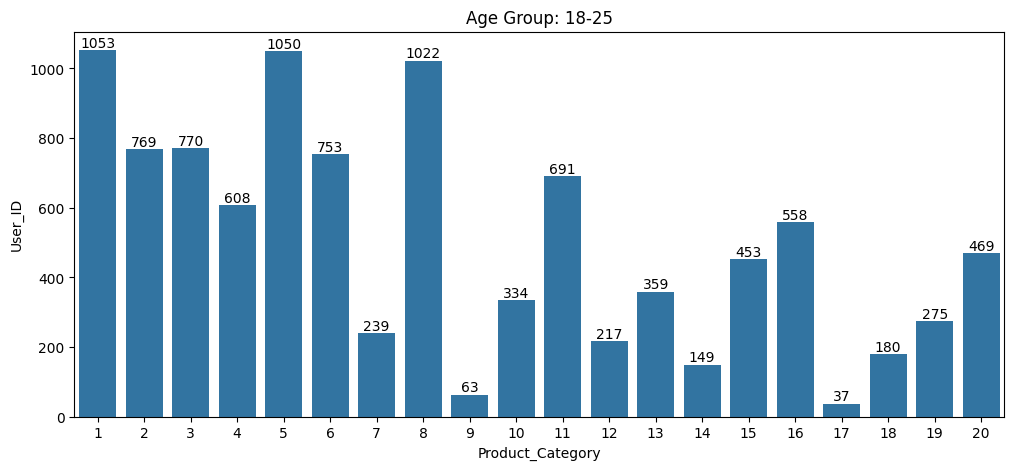

In [ ]:
df_age2=df_age_product[df_age_product['Age']=='18-25']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age2,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 18-25")
plt.show()

# Age Group:- 26-35

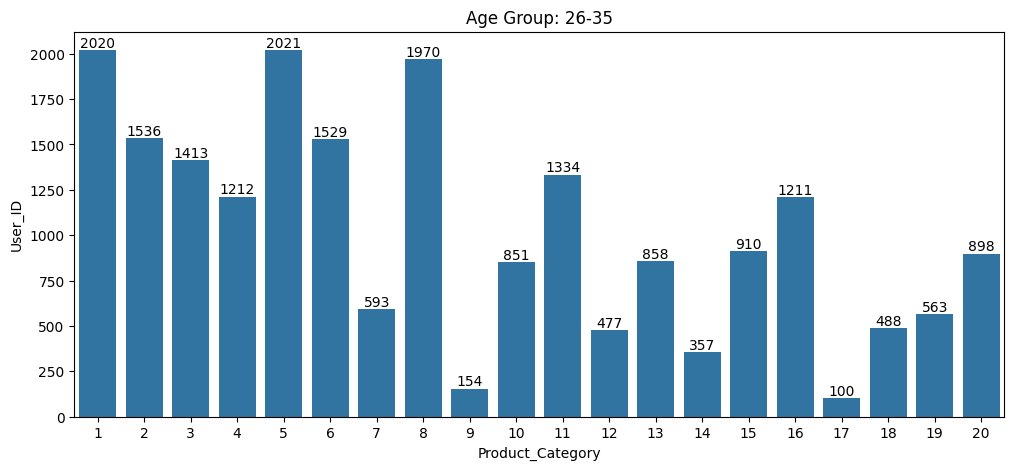

In [ ]:
df_age3=df_age_product[df_age_product['Age']=='26-35']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age3,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 26-35")
plt.show()

# Age Group:- 36-45

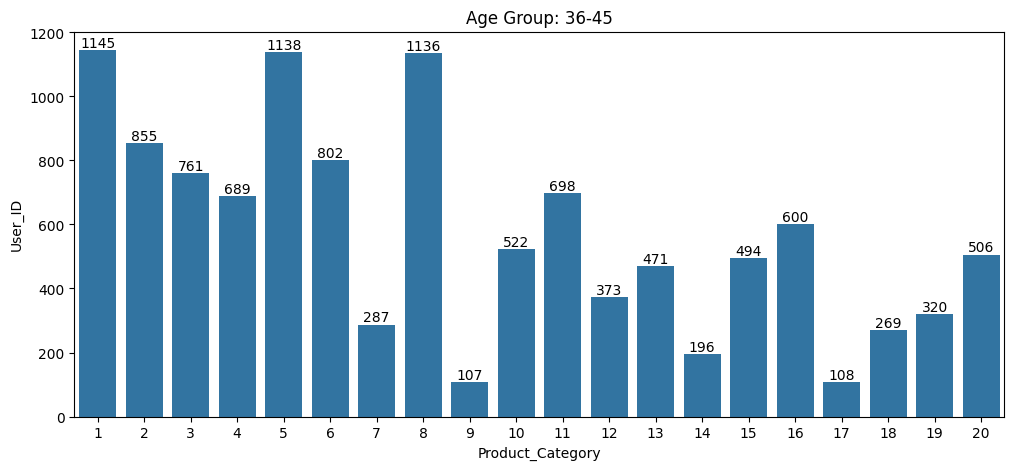

In [ ]:
df_age4=df_age_product[df_age_product['Age']=='36-45']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age4,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 36-45")
plt.show()

# Age Group:- 46-50

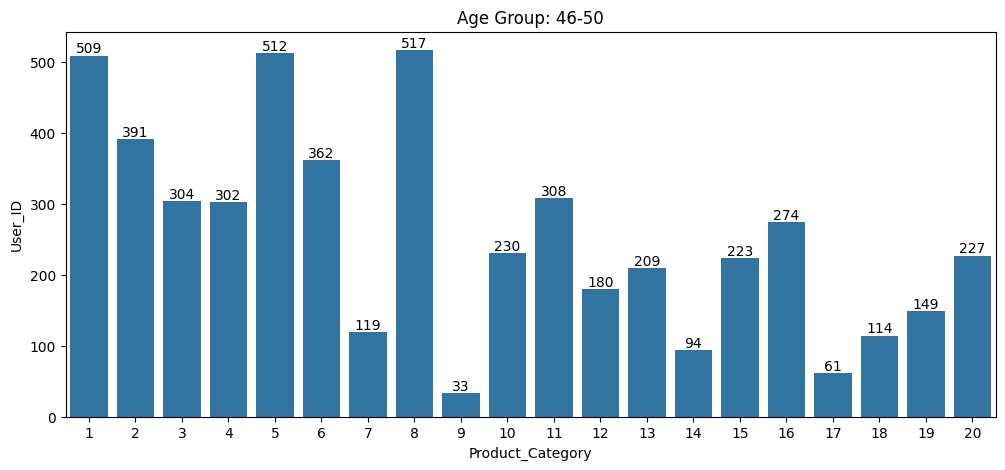

In [ ]:
df_age5=df_age_product[df_age_product['Age']=='46-50']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age5,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 46-50")
plt.show()

# Age Group:- 51-55

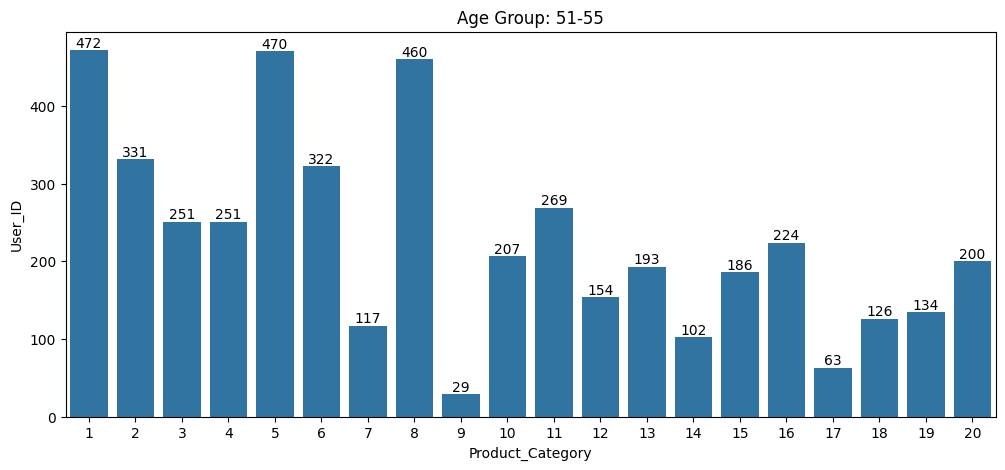

In [ ]:
df_age6=df_age_product[df_age_product['Age']=='51-55']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age6,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 51-55")
plt.show()

# Age Group:- 55+

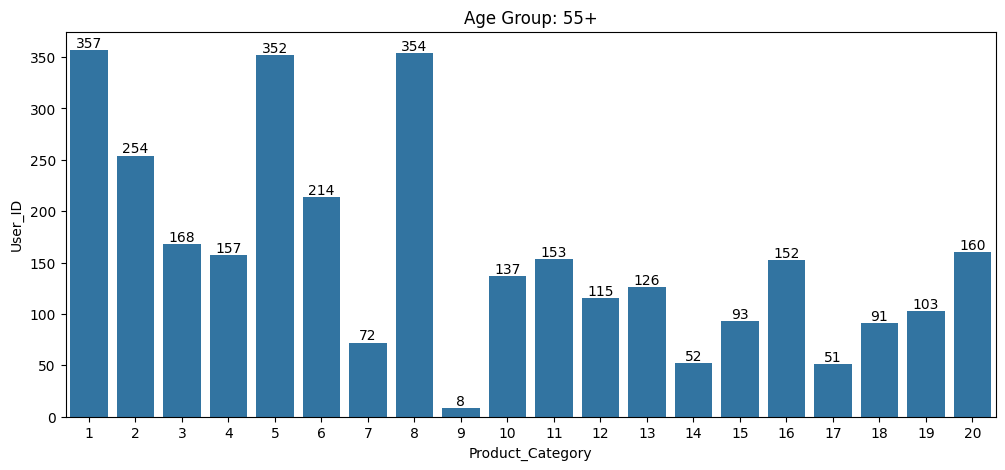

In [ ]:
df_age7=df_age_product[df_age_product['Age']=='55+']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_age7,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Age Group: 55+")
plt.show()

* # Is there a relationship between age, marital status, and the amount spent?

In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df_age_marital_status_purchase = df_user_product.groupby(['Age','Marital_Status'])['Purchase'].sum().reset_index()
df_age_marital_status_purchase.sort_values(by=['Age','Marital_Status'])

Age  Marital_Status    Purchase
0    0-17               0   134913183
1   18-25               0   723920602
2   18-25               1   189928073
3   26-35               0  1233330102
4   26-35               1   798440476
5   36-45               0   624110760
6   36-45               1   402459124
7   46-50               0   113658360
8   46-50               1   307185043
9   51-55               0   103792394
10  51-55               1   263307250
11    55+               0    75202046
12    55+               1   125565329

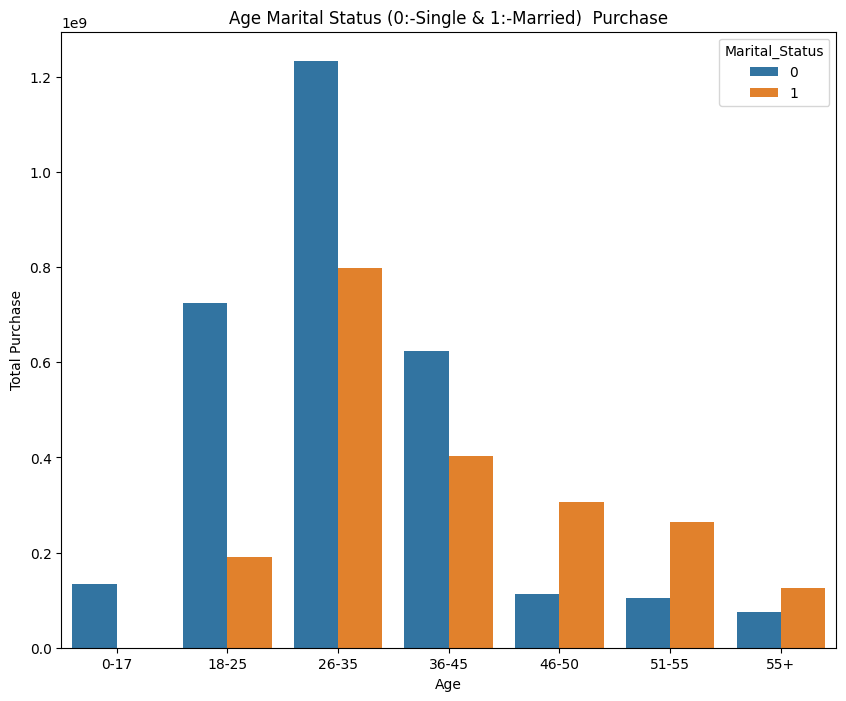

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_age_marital_status_purchase, x='Age', y='Purchase', hue='Marital_Status')
plt.ylabel('Total Purchase')
plt.title("Age Marital Status (0:-Single & 1:-Married)  Purchase")
plt.show()

* Observation:
  * Age group **26-35**, who are **Single**, are buying **Most** with a sum of **1233330102**.
  * Age group **26-35**, who are **Married**, are buying **Second most** with a sum of **798440476**.
  * Age group **18-25**, who are **Single**, are buying **Third most** with a sum of **723920602**.

* # Are there preferred product categories for different genders?


In [ ]:
df_gender_product_category = df_user_product.groupby(['Gender','Product_Category'])['User_ID'].nunique().reset_index()
df_gender_product_category.head(30)

Gender  Product_Category  User_ID
0       F                 1     1593
1       F                 2     1146
2       F                 3     1093
3       F                 4      966
4       F                 5     1638
5       F                 6     1090
6       F                 7      351
7       F                 8     1614
8       F                 9       70
9       F                10      513
10      F                11      867
11      F                12      555
12      F                13      586
13      F                14      378
14      F                15      501
15      F                16      816
16      F                17       60
17      F                18      207
18      F                19      451
19      F                20      723
20      M                 1     4174
21      M                 2     3150
22      M                 3     2745
23      M                 4     2395
24      M                 5     4113
25      M                 6     2995
26      M                 7     1110
27      M                 8     4045
28      M                 9      340
29      M                10     1815

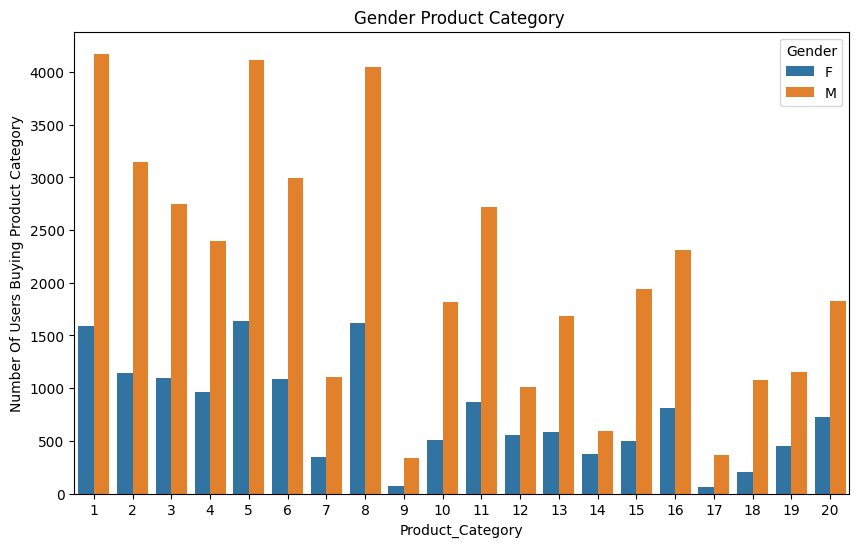

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df_gender_product_category, x='Product_Category', y='User_ID', hue='Gender')
plt.ylabel('Number Of Users Buying Product Category')
plt.title("Gender Product Category ")
plt.show()

In [ ]:
gender_wise_max_product_category_count = df_gender_product_category.groupby('Gender')['User_ID'].max().reset_index()
df_gender_product_category.merge(gender_wise_max_product_category_count, left_on=['Gender','User_ID'], right_on=['Gender','User_ID']).rename(columns={'User_ID':'Count'})

Gender  Product_Category  Count
0      F                 5   1638
1      M                 1   4174

# Male

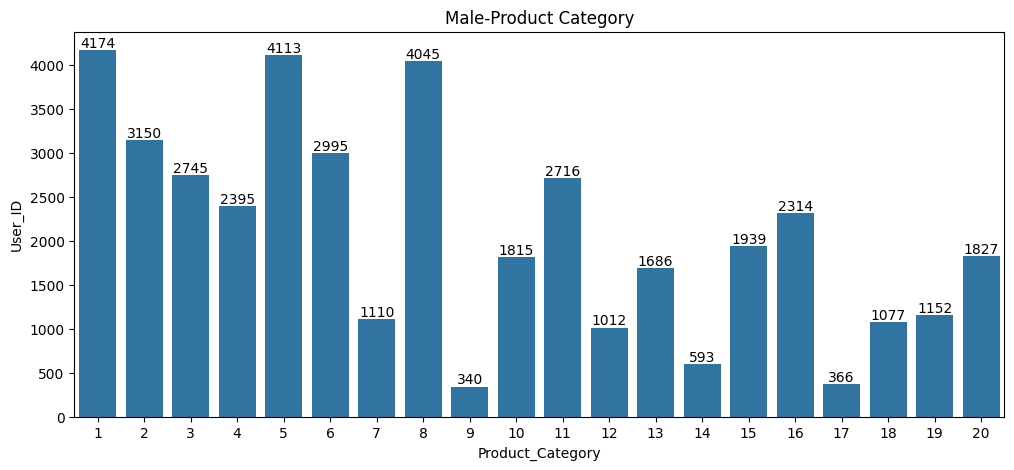

In [ ]:
df_male=df_gender_product_category[df_gender_product_category['Gender']=='M']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_male,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Male-Product Category")
plt.show()

# Female

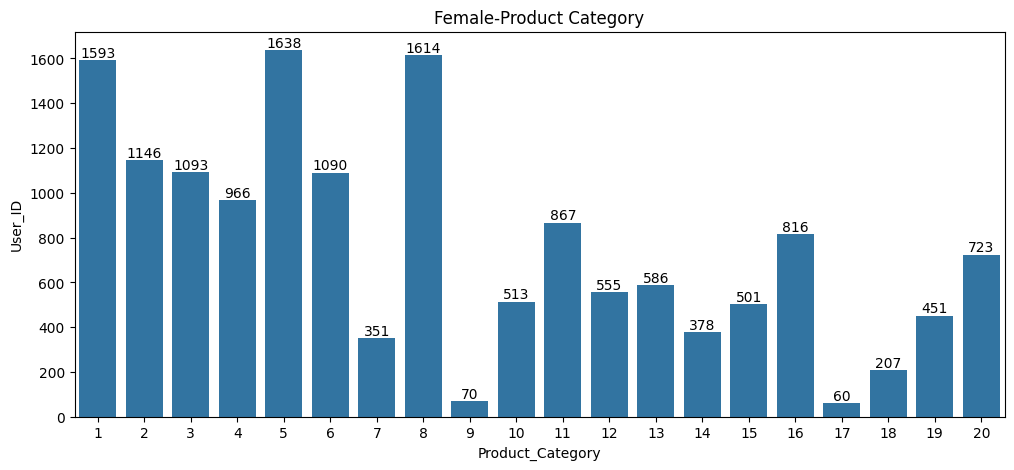

In [ ]:
df_female=df_gender_product_category[df_gender_product_category['Gender']=='F']
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_female,x='Product_Category',y='User_ID')
ax.bar_label(ax.containers[0])
plt.title("Female-Product Category")
plt.show()

* Observations
  * **Product_category 5** is bought my **1638 females** which is highest purchase by Female in any category
  * **Product_category 1** is bought my **4174 males** which is highest purchase by Male in any category

# **4. How does gender affect the amount spent?**

---



In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

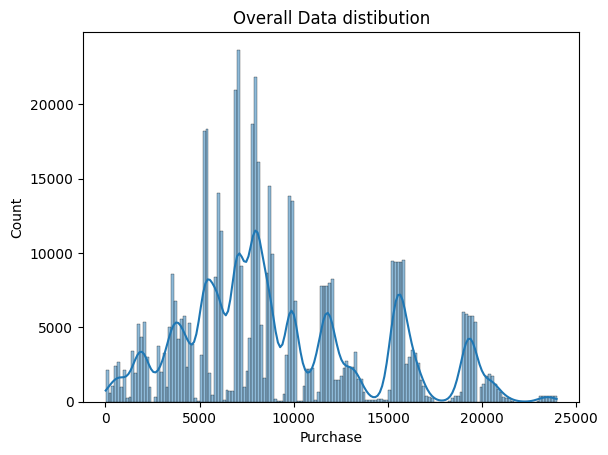

In [ ]:
sns.histplot(data =df, x ='Purchase', kde = True)
plt.title("Overall Data distibution")
plt.show()

* Observation:
  * Its **not** look like **Normal Distibution**.
  * So, We will use **CLT(Central Limit Theorem)**.

In [ ]:
male = df[df['Gender']=='M']['Purchase']
female = df[df['Gender']=='F']['Purchase']
overall=df['Purchase']

In [ ]:
male.mean(), male.std()

(9437.526040472265, 5092.18620977797)

In [ ]:
female.mean(), female.std()

(8734.565765155476, 4767.233289291458)

In [ ]:
overall.mean(), overall.std()

(9263.968712959126, 5023.065393820582)

* Observation:
  * **Male** Dataset:
    * **Mean:- 9437.52**, **Standard Deviation:- 5092.18**
  * **Female** Dataset:
    * **Mean:- 8734.56**, **Standard Deviation:- 4767.23**
  * **Overall** Dataset:
    * **Mean:- 9263.96**, **Standard Deviation:- 5023.06**


# Sample size 300

In [ ]:
male_s300 = [np.mean(male.sample(300)).round(2) for i in range(1000)]
print(male_s300)

[9656.03, 9176.76, 9200.08, 9450.01, 9615.12, 9036.51, 9688.29, 9521.73, 9450.09, 10057.38, 9094.14, 9482.82, 9185.35, 9360.47, 9710.42, 9284.53, 9889.48, 9850.43, 9431.55, 9867.34, 9495.86, 9785.64, 9211.78, 9346.3, 9167.9, 9806.46, 9878.12, 9323.55, 9203.28, 9585.35, 9335.58, 9163.48, 9683.97, 9904.65, 9167.85, 9216.44, 9428.4, 9501.71, 9541.15, 9903.32, 9703.73, 9325.49, 9519.85, 9275.58, 9994.09, 9339.3, 9729.13, 9710.43, 9663.03, 9537.24, 8940.8, 9480.88, 9293.86, 9827.03, 9778.1, 9399.31, 9333.87, 9081.25, 9139.21, 10068.78, 9669.74, 9868.55, 9235.46, 9234.52, 9050.55, 9100.8, 9631.76, 10078.08, 9160.63, 9355.55, 9723.1, 9104.06, 9752.68, 9417.25, 9322.47, 9437.17, 9619.19, 9081.02, 9742.82, 9660.58, 9703.68, 9178.78, 9271.3, 9804.64, 9709.01, 9384.95, 9292.89, 9478.8, 9485.84, 9648.8, 9382.95, 9631.38, 9825.69, 9243.98, 8684.22, 9510.52, 9842.55, 10072.72, 9163.96, 9292.17, 9640.3, 9188.69, 9359.37, 9006.71, 9445.52, 9009.88, 9613.27, 8828.57, 9286.81, 9410.1, 9635.35, 9554.28, 

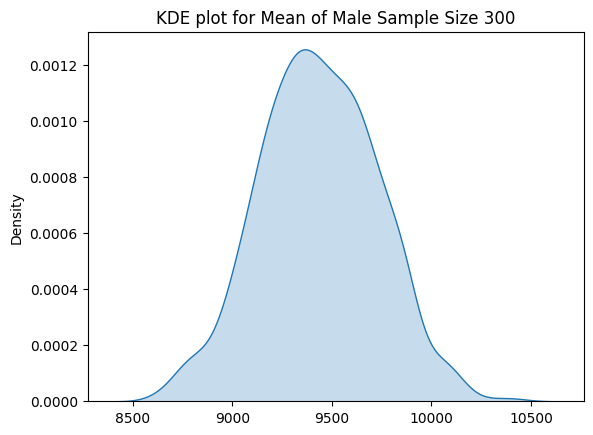

In [ ]:
sns.kdeplot(x = male_s300,fill=True)
plt.title("KDE plot for Mean of Male Sample Size 300")
plt.show()

In [ ]:
female_s300 = [np.mean(female.sample(300)).round(2) for i in range(1000)]
print(female_s300)

[8337.08, 9059.58, 8660.21, 8738.97, 9064.71, 8709.76, 8635.01, 8584.09, 9231.74, 8369.46, 9014.62, 9228.95, 8869.52, 8560.06, 8457.71, 8685.18, 9184.05, 8365.05, 8868.23, 8976.4, 8870.11, 9215.09, 9270.53, 8302.65, 9033.95, 8427.77, 8377.07, 8722.47, 8906.26, 9011.56, 8367.29, 8739.65, 8491.99, 8490.86, 9087.66, 8771.42, 8503.2, 8961.84, 8886.32, 8652.73, 9259.41, 8754.33, 9020.46, 8379.65, 8430.97, 8575.71, 8858.56, 8952.1, 9183.63, 8366.48, 8796.82, 8688.96, 8515.89, 8691.8, 8941.6, 9205.25, 8881.13, 8598.54, 8636.65, 8798.61, 8783.96, 8667.65, 8915.22, 8493.37, 8957.64, 8580.53, 8533.15, 8184.71, 8869.94, 8549.8, 8878.02, 8734.8, 8561.13, 8624.88, 8902.6, 8984.91, 8382.81, 8450.79, 9111.23, 8456.63, 9041.25, 8729.34, 8989.1, 8996.28, 8559.92, 9034.49, 8744.93, 8698.44, 8828.34, 8742.87, 8227.66, 8961.22, 8693.87, 8713.91, 8512.53, 8689.0, 8477.18, 9104.2, 8471.67, 8718.63, 9193.6, 8605.13, 8475.72, 8919.6, 8484.77, 8673.13, 9252.21, 8929.15, 8687.24, 8627.51, 8720.33, 8938.34, 8895

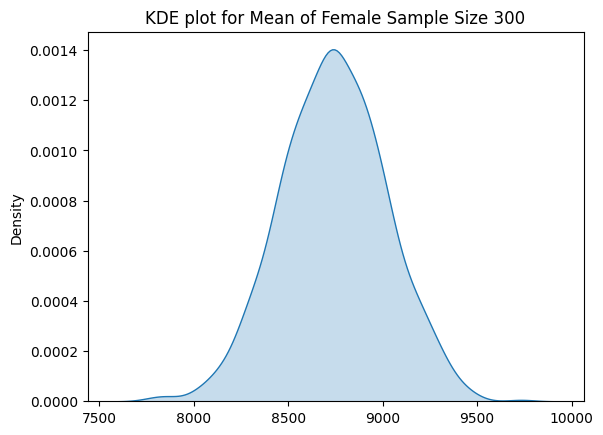

In [ ]:
sns.kdeplot(x = female_s300,fill=True)
plt.title("KDE plot for Mean of Female Sample Size 300")
plt.show()

In [ ]:
overall_s300 = [np.mean(overall.sample(300)).round(2) for i in range(1000)]
print(overall_s300)

[9399.64, 9035.2, 9250.83, 8786.16, 9083.78, 8852.7, 9040.24, 8873.59, 9371.56, 9088.99, 9055.83, 9259.83, 9048.54, 9264.84, 9591.21, 9317.51, 9130.88, 9257.91, 8980.83, 9204.63, 9166.29, 9322.92, 9255.76, 9472.77, 8791.19, 9014.3, 9305.41, 9115.34, 9327.9, 9225.75, 9301.53, 9661.74, 9538.82, 9288.14, 9388.83, 9548.63, 9375.97, 9747.61, 9069.99, 9005.78, 9691.96, 9510.74, 9050.93, 9738.33, 8951.02, 9534.87, 9104.71, 9691.38, 9514.24, 10162.18, 9435.11, 9213.31, 9548.32, 9044.67, 9193.71, 9039.71, 8760.67, 9478.8, 9634.31, 9119.44, 9003.04, 8952.75, 9520.73, 9511.8, 9464.14, 9226.77, 9384.66, 9287.73, 9281.25, 9601.41, 9310.1, 9347.08, 9553.77, 9256.97, 8904.89, 9474.57, 9210.25, 9408.96, 9008.58, 9634.17, 9514.94, 9537.27, 9667.42, 8751.12, 9492.92, 9449.99, 9313.34, 9026.4, 9225.88, 9846.0, 9305.28, 9545.72, 9272.28, 8817.84, 9431.38, 8998.49, 9439.14, 9297.16, 8963.72, 9645.53, 9564.94, 9235.53, 9722.77, 9153.64, 9735.66, 9150.67, 9258.73, 9353.16, 9753.19, 9016.21, 9125.57, 9319.68,

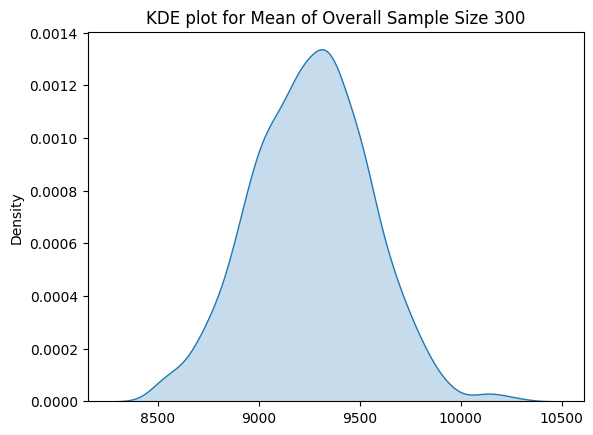

In [ ]:
sns.kdeplot(x = overall_s300,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 300")
plt.show()

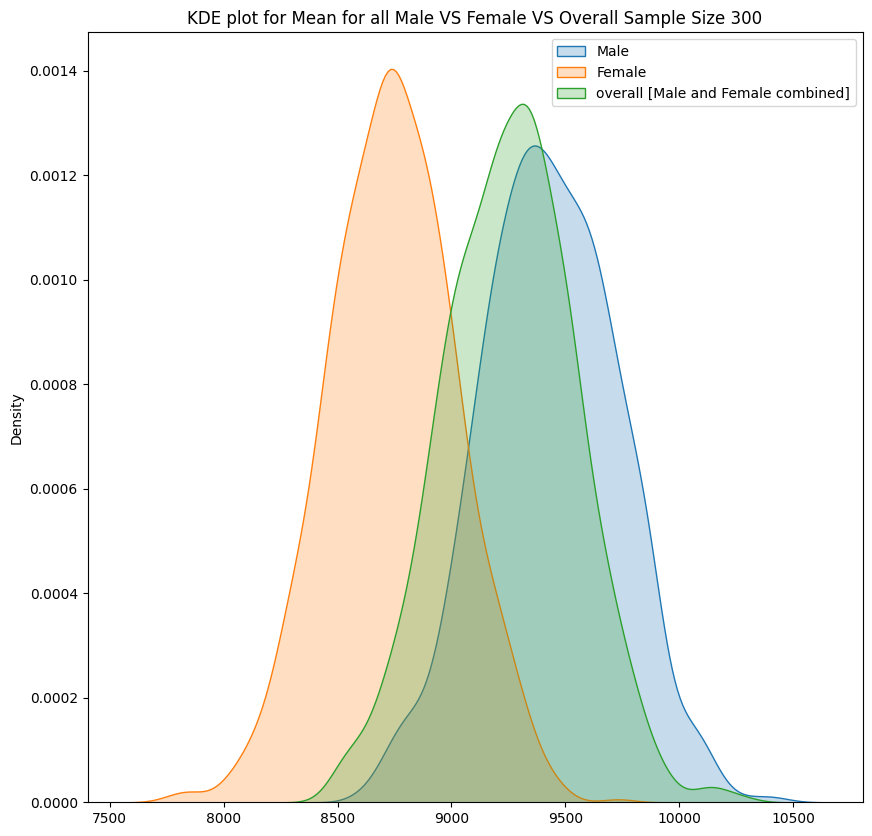

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = male_s300,label='Male',fill=True)
sns.kdeplot(x = female_s300,label='Female',fill=True)
sns.kdeplot(x = overall_s300, label='overall [Male and Female combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Male VS Female VS Overall Sample Size 300")
plt.show()

# For **90 Percent Confidence Interval**.

In [ ]:
from scipy.stats import norm
norm.ppf(0.05)

-1.6448536269514729

In [ ]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

We will use **z value (+/-)1.6448**

**Overall** 300 Sample Mean Data

In [ ]:
p_o = np.mean(overall_s300)
p_o

9256.23945

In [ ]:
se_o= np.std(overall)/np.sqrt(300)
se_o

290.0065521178529

* Observation: For Overall with sample size 300
  * **Mean: 9256.23**
  * **Standard Error: 290**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[8779.236673076555, 9733.242226923443]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **8779 to 9733**

**Male** 300 Sample Mean Data

In [ ]:
p_m = np.mean(male_s300)
p_m

9432.473460000001

In [ ]:
se_m= np.std(male)/np.sqrt(300)
se_m

293.997153050227

* Observation: For Males with sample size 300
  * **Mean: 9432.47**
  * **Standard Error: 293.99**

In [ ]:
[p_m-1.6448*se_m, p_m+1.6448*se_m]

[8948.906942662989, 9916.039977337014]

**90%** of the times, the sample purchase amount average for the **Male** happen to be between **8948 to 9916**

**Female** 300 Sample Mean Data

In [ ]:
p_f = np.mean(female_s300)
p_f

8738.36709

In [ ]:
se_f= np.std(female)/np.sqrt(300)
se_f

275.23532896291374

* Observation: For Female with sample size 300
  * **Mean: 8738.36**
  * **Standard Error: 275.23**

In [ ]:
[p_f-1.6448*se_f, p_f+1.6448*se_f]

[8285.6600209218, 9191.0741590782]

**90%** of the times, the sample purchase amount average for the **Female** happen to be between **8285 to 9191**

# For **95 Percent Confidence Interval.**

In [ ]:
norm.ppf(0.025)

-1.9599639845400545

In [ ]:
norm.ppf(0.975)

1.959963984540054

We will use **z value (+/-)1.9599**

**Overall** 300 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[8687.85560850422, 9824.623291495778]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **8687 to 9824**

**Male** 300 Sample Mean Data

In [ ]:
[p_m-1.9599*se_m, p_m+1.9599*se_m]

[8856.268439736861, 10008.678480263141]

**95%** of the times, the sample purchase amount average for the **Male** happen to be between **8856 to 10008**

**Female** 300 Sample Mean Data

In [ ]:
[p_f-1.9599*se_f, p_f+1.9599*se_f]

[8198.933368765585, 9277.800811234414]

**95%** of the times, the sample purchase amount average for the **Female** happen to be between **8198 to 9277**

# For **99 Percent Confidence Interval.**

In [ ]:
norm.ppf(0.005)

-2.575829303548901

In [ ]:
norm.ppf(0.995)

2.5758293035489004

We will use **z value (+/-)2.5758**

**Overall** 300 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[8509.240573054834, 10003.238326945164]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **8509 to 10003**

**Male** 300 Sample Mean Data

In [ ]:
[p_m-2.5758*se_m, p_m+2.5758*se_m]

[8675.195593173226, 10189.751326826776]

**99%** of the times, the sample purchase amount average for the **Male** happen to be between **8675 to 10189**

**Female** 300 Sample Mean Data

In [ ]:
[p_f-2.5758*se_f, p_f+2.5758*se_f]

[8029.415929657326, 9447.318250342672]

**99%** of the times, the sample purchase amount average for the **Female** happen to be between **8029 to 9447**

* Observation: **Sample Size 300**
  * Z value:
    * 90% :- (+/-)1.6448
    * 95% :- (+/-)1.9599
    * 99% :- (+/-)2.5758
* For Overall with sample size 300
  * **Mean: 9256.23**
  * **Standard Error: 290**
* For Males with sample size 300
  * **Mean: 9432.47**
  * **Standard Error: 293.99**
* For **Females** with **sample size 300**
  * **Mean: 8732.61**
  * **Standard Error: 87.03**

  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **8787 to 9741**.
    * the sample purchase amount average for the **Male** happen to be between **8948 to 9916**
    * the sample purchase amount average for the **Female** happen to be between **8285 to 9191**
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between **8687 to 9824**.
    * The sample purchase amount average for the **Male** happen to be between **8856 to 10008**.
    * The sample purchase amount average for the **Female** happen to be between **8198 to 9277**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **8509 to 10003**.
    * The sample purchase amount average for the **Males** happen to be between **8675 to 10189**
    * The sample purchase amount average for the **Female** happen to be between **8029 to 9447**

# Sample size 3000

In [ ]:
male_s3000 = [np.mean(male.sample(3000)).round(2) for i in range(1000)]

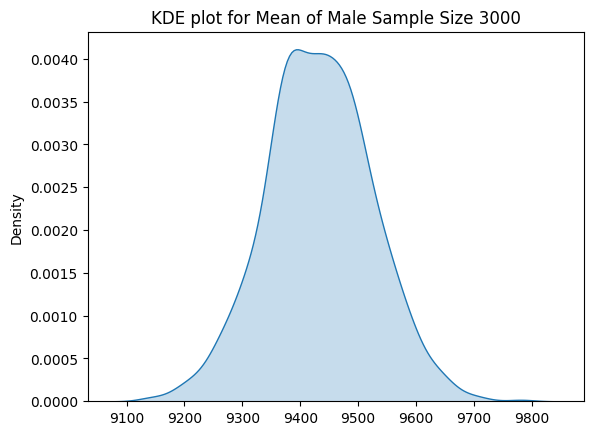

In [ ]:
sns.kdeplot(x = male_s3000,fill=True)
plt.title("KDE plot for Mean of Male Sample Size 3000")
plt.show()

In [ ]:
female_s3000 = [np.mean(female.sample(3000)).round(2) for i in range(1000)]

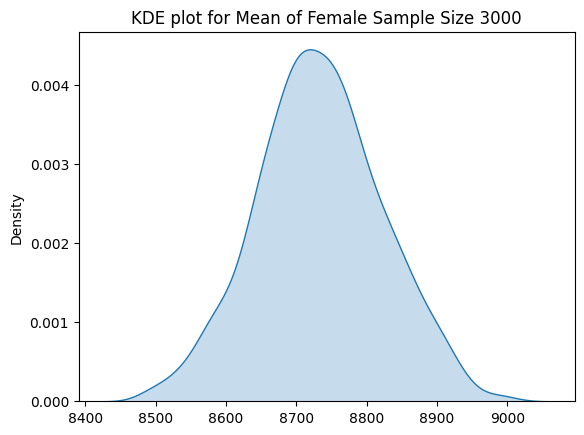

In [ ]:
sns.kdeplot(x = female_s3000,fill=True)
plt.title("KDE plot for Mean of Female Sample Size 3000")
plt.show()

In [ ]:
overall_s3000 = [np.mean(overall.sample(3000)).round(2) for i in range(1000)]

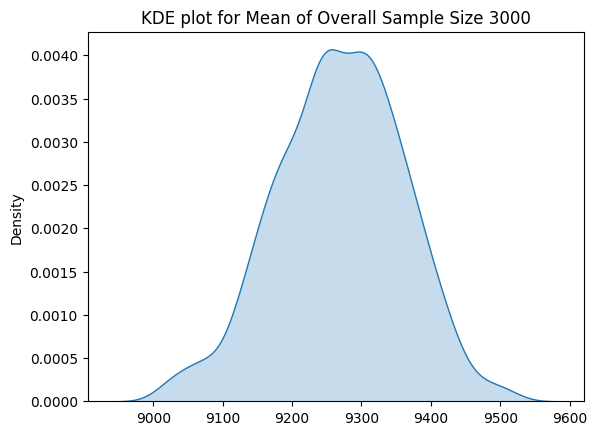

In [ ]:
sns.kdeplot(x = overall_s3000,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 3000")
plt.show()

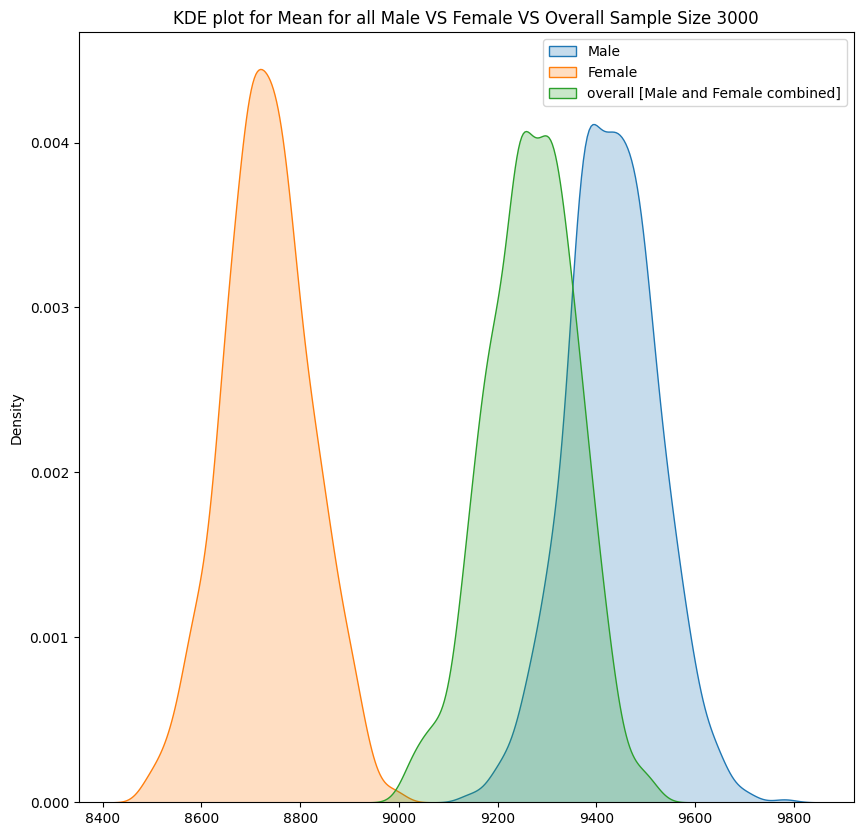

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = male_s3000,label='Male',fill=True)
sns.kdeplot(x = female_s3000,label='Female',fill=True)
sns.kdeplot(x = overall_s3000, label='overall [Male and Female combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Male VS Female VS Overall Sample Size 3000")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 3000 Sample size Mean Data

In [ ]:
p_o = np.mean(overall_s3000)
p_o

9268.20702

In [ ]:
se_o= np.std(overall)/np.sqrt(3000)
se_o

91.7081241064743

* Observation: For Overall with **sample size 3000**
  * **Mean: 9268.2**
  * **Standard Error: 91.7**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[9117.365497469671, 9419.048542530329]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **9117 to 9419**

**Male** 3000 Sample Mean Data

In [ ]:
p_m = np.mean(male_s3000)
p_m

9432.088810000001

In [ ]:
se_m= np.std(male)/np.sqrt(3000)
se_m

92.97006292438367

* Observation: For Males with **sample size 3000**
  * **Mean: 9432.08**
  * **Standard Error: 92.97**

In [ ]:
[p_m-1.6448*se_m, p_m+1.6448*se_m]

[9279.171650501974, 9585.005969498028]

**90%** of the times, the sample purchase amount average for the **Male** happen to be between **9279 to 9585**

**Female** 3000 Sample Mean Data

In [ ]:
p_f = np.mean(female_s3000)
p_f

8732.611469999998

In [ ]:
se_f= np.std(female)/np.sqrt(3000)
se_f

87.03705320685171

* Observation: For **Females** with **sample size 300**
  * **Mean: 8732.61**
  * **Standard Error: 87.03**

In [ ]:
[p_f-1.6448*se_f, p_f+1.6448*se_f]

[8589.452924885369, 8875.770015114627]

**90%** of the times, the sample purchase amount average for the **Female** happen to be between **8589 to 8875**

# For **95 Percent Confidence Interval.**

**Overall** 3000 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[9088.468267563721, 9447.945772436278]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **9088 to 9447**

**Male** 3000 Sample Mean Data

In [ ]:
[p_m-1.9599*se_m, p_m+1.9599*se_m]

[9249.876783674501, 9614.300836325501]

**95%** of the times, the sample purchase amount average for the **Male** happen to be between **9249 to 9614**

**Female** 3000 Sample Mean Data

In [ ]:
[p_f-1.9599*se_f, p_f+1.9599*se_f]

[8562.027549419889, 8903.195390580107]

**95%** of the times, the sample purchase amount average for the **Female** happen to be between **8562 to 8903**

# For **99 Percent Confidence Interval.**

**Overall** 3000 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[9031.985233926544, 9504.428806073456]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **9031 to 9504**

**Male** 3000 Sample Mean Data

In [ ]:
[p_m-2.5758*se_m, p_m+2.5758*se_m]

[9192.616521919374, 9671.561098080629]

**99%** of the times, the sample purchase amount average for the **Male** happen to be between **9192 to 9671**

**Female** 3000 Sample Mean Data

In [ ]:
[p_f-2.5758*se_f, p_f+2.5758*se_f]

[8508.42142834979, 8956.801511650207]

**99%** of the times, the sample purchase amount average for the **Female** happen to be between **8508 to 8956**

* Observation:3000 sample Size
* For Overall with **sample size 3000**
  * **Mean: 9268.2**
  * **Standard Error: 91.7**
* For Males with **sample size 3000**
  * **Mean: 9432.08**
  * **Standard Error: 92.97**
* For **Females** with **sample size 300**
  * **Mean: 8732.61**
  * **Standard Error: 87.03**

  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **9117 to 9419**.
    * The sample purchase amount average for the **Male** happen to be between **9279 to 9585**.
    * The sample purchase amount average for the **Female** happen to be between **8589 to 8875**.
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between **9088 to 9447**.
    * The sample purchase amount average for the **Male** happen to be between **9249 to 9614**.
    * The sample purchase amount average for the **Female** happen to be between **8562 to 8903**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **9031 to 9504**.
    * The sample purchase amount average for the **overall data** happen to be between **9192 to 9671**
    * The sample purchase amount average for the **Female** happen to be between **8508 to 8956**

# Sample size 30000

In [ ]:
male_s30000 = [np.mean(male.sample(30000)).round(2) for i in range(1000)]

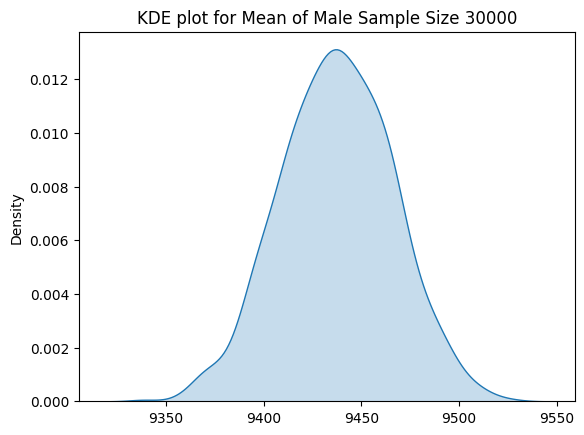

In [ ]:
sns.kdeplot(x = male_s30000,fill=True)
plt.title("KDE plot for Mean of Male Sample Size 30000")
plt.show()

In [ ]:
female_s30000 = [np.mean(female.sample(30000)).round(2) for i in range(1000)]

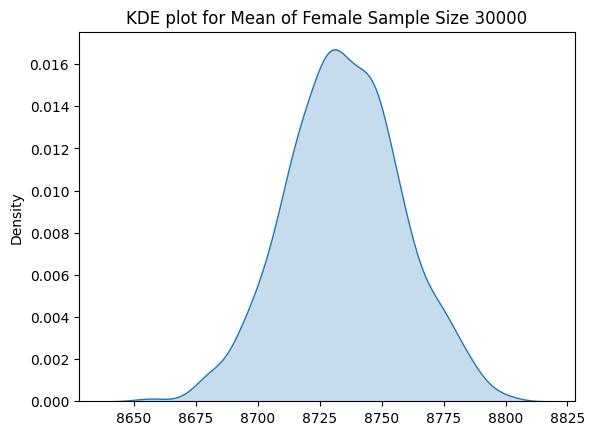

In [ ]:
sns.kdeplot(x = female_s30000,fill=True)
plt.title("KDE plot for Mean of Female Sample Size 30000")
plt.show()

In [ ]:
overall_s30000 = [np.mean(overall.sample(30000)).round(2) for i in range(1000)]

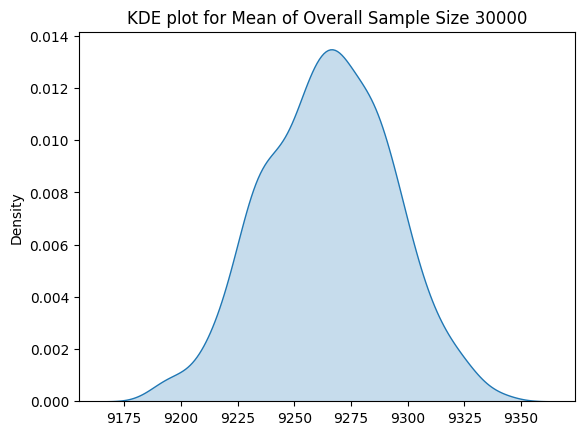

In [ ]:
sns.kdeplot(x = overall_s30000,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 30000")
plt.show()

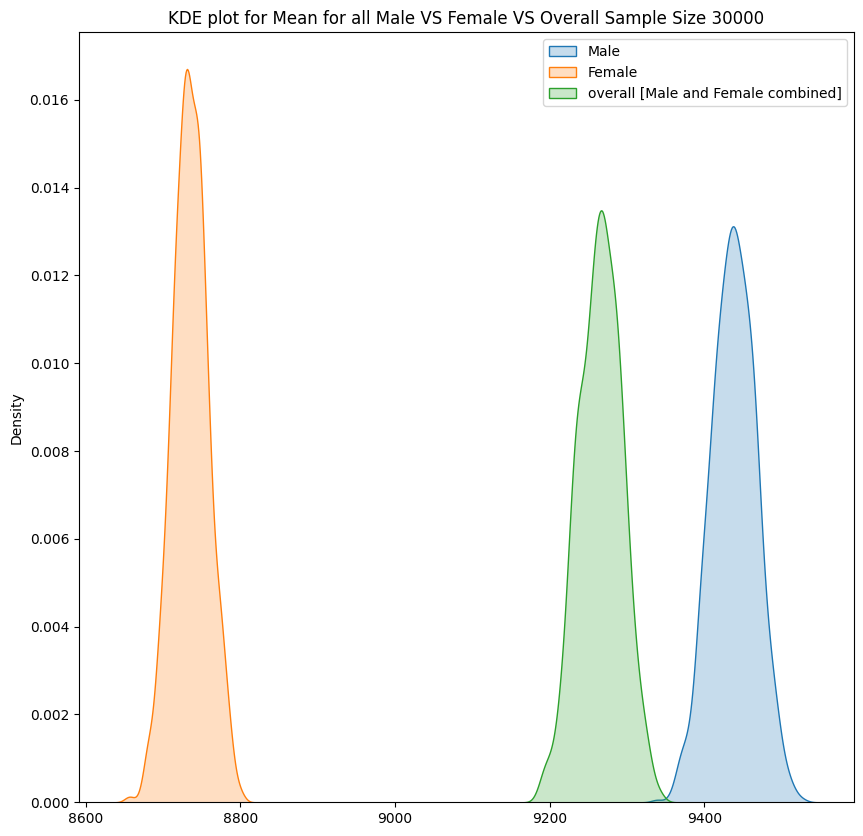

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = male_s30000,label='Male',fill=True)
sns.kdeplot(x = female_s30000,label='Female',fill=True)
sns.kdeplot(x = overall_s30000, label='overall [Male and Female combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Male VS Female VS Overall Sample Size 30000")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 30000 Sample size Mean Data

In [ ]:
p_o = np.mean(overall_s30000)
p_o

9264.818449999999

In [ ]:
se_o= np.std(overall)/np.sqrt(30000)
se_o

29.00065521178529

* Observation: For **Overall** with **sample size 30000**
  * **Mean: 9264.81**
  * **Standard Error: 29**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[9217.118172307655, 9312.518727692343]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **9217 to 9312**

**Male** 30000 Sample Mean Data

In [ ]:
p_m = np.mean(male_s30000)
p_m

9437.429

In [ ]:
se_m= np.std(male)/np.sqrt(30000)
se_m

29.3997153050227

* Observation: For **Male** with **sample size 30000**
  * **Mean: 9437.42**
  * **Standard Error: 29.39**

In [ ]:
[p_m-1.6448*se_m, p_m+1.6448*se_m]

[9389.072348266298, 9485.785651733702]

**90%** of the times, the sample purchase amount average for the **Male** happen to be between **9389.07 to 9485.78**

**Female** 30000 Sample Mean Data

In [ ]:
p_f = np.mean(female_s30000)
p_f

8734.7411

In [ ]:
se_f= np.std(female)/np.sqrt(30000)
se_f

27.52353289629138

* Observation: For Overall with sample size 300
  * **Mean: 8734.74**
  * **Standard Error: 27.52**

In [ ]:
[p_f-1.6448*se_f, p_f+1.6448*se_f]

[8689.470393092179, 8780.01180690782]

**90%** of the times, the sample purchase amount average for the **Female** happen to be between **8689 to 8780**

# For **95 Percent Confidence Interval.**

**Overall** 30000 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[9207.980065850421, 9321.656834149577]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **9207 to 9321**

**Male** 30000 Sample Mean Data

In [ ]:
[p_m-1.9599*se_m, p_m+1.9599*se_m]

[9379.808497973687, 9495.049502026313]

**95%** of the times, the sample purchase amount average for the **Male** happen to be between **9379 to 9495**

**Female** 30000 Sample Mean Data

In [ ]:
[p_f-1.9599*se_f, p_f+1.9599*se_f]

[8680.797727876557, 8788.684472123441]

**95%** of the times, the sample purchase amount average for the **Female** happen to be between **8680 to 8788**

# For **99 Percent Confidence Interval.**

**Overall** 30000 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[9190.118562305483, 9339.518337694515]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **9190 to 9339**

**Male** 30000 Sample Mean Data

In [ ]:
[p_m-2.5758*se_m, p_m+2.5758*se_m]

[9361.701213317323, 9513.156786682677]

**99%** of the times, the sample purchase amount average for the **Male** happen to be between **9361 to 9513**

**Female** 30000 Sample Mean Data

In [ ]:
[p_f-2.5758*se_f, p_f+2.5758*se_f]

[8663.845983965732, 8805.636216034267]

**99%** of the times, the sample purchase amount average for the **Female** happen to be between **8663 to 8805**

* Observation:30000 sample Size
* For **Overall** with **sample size 30000**
  * **Mean: 9264.81**
  * **Standard Error: 29**
* For **Male** with **sample size 30000**
  * **Mean: 9437.42**
  * **Standard Error: 29.39**
* * Observation: For Overall with sample size 300
  * **Mean: 8734.74**
  * **Standard Error: 27.52**

  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **9217 to 9312**.
    * The sample purchase amount average for the **Male** happen to be between **9389.07 to 9485.78**.
    * The sample purchase amount average for the **Female** happen to be between **8689 to 8780**.
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between **9207 to 9321**.
    * The sample purchase amount average for the **Male** happen to be between **9379 to 9495**.
    * The sample purchase amount average for the **Female** happen to be between **8680 to 8788**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **9190 to 9339**.
    * The sample purchase amount average for the **overall data** happen to be between **9361 to 9513**
    * The sample purchase amount average for the **Female** happen to be between **8663 to 8805**

# <font color="green"> Observation:
  * As sample **size increases**, **Confidence interval becomes narrow** and **standard errors are also decreasing**.
  * We can clearly see that **Male are spending more than females**.

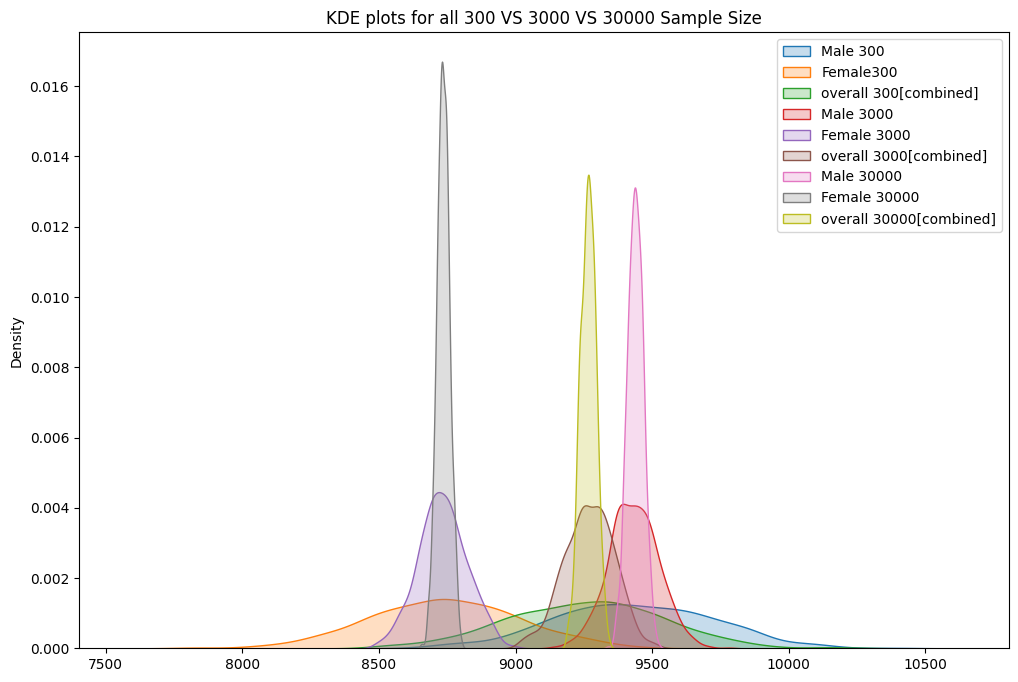

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(x = male_s300,label='Male 300',fill=True)
sns.kdeplot(x = female_s300,label='Female300',fill=True)
sns.kdeplot(x = overall_s300, label='overall 300[combined]',fill=True)
sns.kdeplot(x = male_s3000,label='Male 3000',fill=True)
sns.kdeplot(x = female_s3000,label='Female 3000',fill=True)
sns.kdeplot(x = overall_s3000, label='overall 3000[combined]',fill=True)
sns.kdeplot(x = male_s30000,label='Male 30000',fill=True)
sns.kdeplot(x = female_s30000,label='Female 30000',fill=True)
sns.kdeplot(x = overall_s30000, label='overall 30000[combined]',fill=True)
plt.legend()
plt.title("KDE plots for all 300 VS 3000 VS 30000 Sample Size")
plt.show()

# <font color="green"> Observation:(**Do the confidence intervals for different sample sizes overlap?**)
  * **Confidence interval overlaps, as the sample size increases mean distribution is narrower**

# **5. How does Marital_Status affect the amount spent?**

---



In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
single = df[df['Marital_Status']==0]['Purchase']
married = df[df['Marital_Status']==1]['Purchase']

In [ ]:
single.mean(), single.std()

(9265.907618921507, 5027.347858674449)

In [ ]:
married.mean(), married.std()

(9261.174574082374, 5016.897377793055)

In [ ]:
overall.mean(), overall.std()

(9263.968712959126, 5023.065393820582)

* Observation:
  * **Single** Dataset:
    * **Mean:- 9265.9**, **Standard Deviation:- 5027.34**
  * **Married** Dataset:
    * **Mean:- 9261.17**, **Standard Deviation:- 5016.89**
  * **Overall** Dataset:
    * **Mean:- 9263.96**, **Standard Deviation:- 5023.06**


# Sample size 300

In [ ]:
single_s300 = [np.mean(single.sample(300)).round(2) for i in range(1000)]

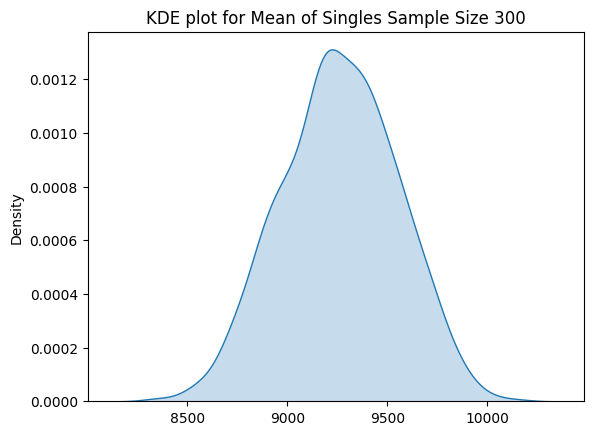

In [ ]:
sns.kdeplot(x = single_s300,fill=True)
plt.title("KDE plot for Mean of Singles Sample Size 300")
plt.show()

In [ ]:
married_s300 = [np.mean(married.sample(300)).round(2) for i in range(1000)]

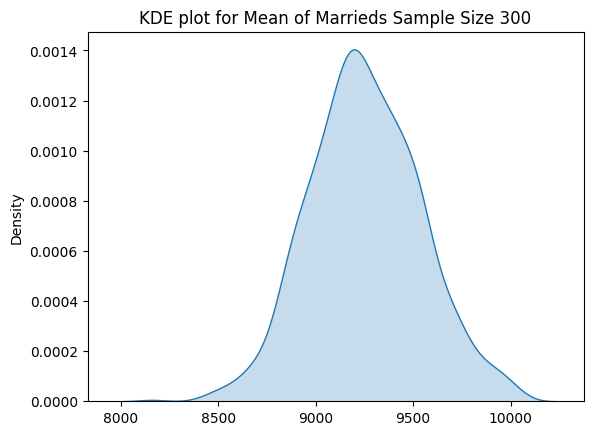

In [ ]:
sns.kdeplot(x = married_s300,fill=True)
plt.title("KDE plot for Mean of Marrieds Sample Size 300")
plt.show()

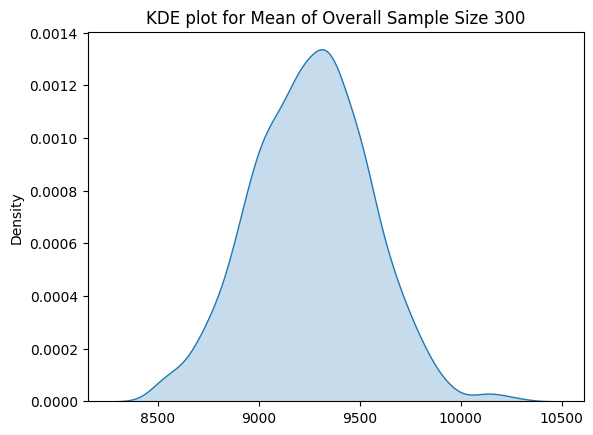

In [ ]:
sns.kdeplot(x = overall_s300,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 300")
plt.show()

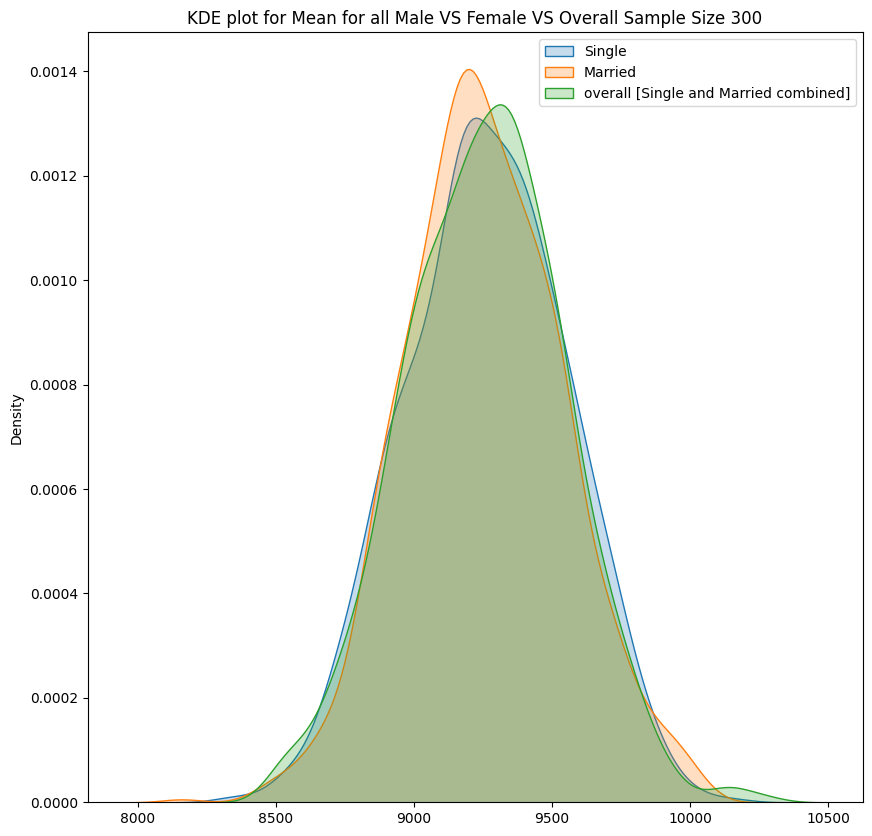

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = single_s300,label='Single',fill=True)
sns.kdeplot(x = married_s300,label='Married',fill=True)
sns.kdeplot(x = overall_s300, label='overall [Single and Married combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Male VS Female VS Overall Sample Size 300")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 300 Sample Mean Data

In [ ]:
p_o = np.mean(overall_s300)
p_o

9256.23945

In [ ]:
se_o= np.std(overall)/np.sqrt(300)
se_o

290.0065521178529

* Observation: For Overall with sample size 300
  * **Mean: 9256.23**
  * **Standard Error: 290**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[8779.236673076555, 9733.242226923443]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **8779 to 9733**

**Singles** 300 Sample Mean Data

In [ ]:
p_s = np.mean(single_s300)
p_s

9259.532449999999

In [ ]:
se_s= np.std(single)/np.sqrt(300)
se_s

290.25361703659246

* Observation: For Single with sample size 300
  * **Mean: 9259.53**
  * **Standard Error: 290.25**

In [ ]:
[p_s-1.6448*se_s, p_s+1.6448*se_s]

[8782.123300698211, 9736.941599301786]

**90%** of the times, the sample purchase amount average for the **Single** happen to be between **8782 to 9736**

**Married** 300 Sample Mean Data

In [ ]:
p_ma = np.mean(married_s300)
p_ma

9253.01793

In [ ]:
se_ma= np.std(married)/np.sqrt(300)
se_ma

289.65006245023824

* Observation: For **Married** with **sample size 300**
  * **Mean: 9253.01**
  * **Standard Error: 289.65**

In [ ]:
[p_ma-1.6448*se_ma, p_ma+1.6448*se_ma]

[8776.601507281848, 9729.434352718152]

**90%** of the times, the sample purchase amount average for the **Married** happen to be between **8776 to 9729**

# For **95 Percent Confidence Interval.**

**Overall** 300 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[8687.85560850422, 9824.623291495778]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **8687 to 9824**

**Single** 300 Sample Mean Data

In [ ]:
[p_s-1.9599*se_s, p_s+1.9599*se_s]

[8690.664385969982, 9828.400514030016]

**95%** of the times, the sample purchase amount average for the **Single** happen to be between **8690 to 9828**

**Married** 300 Sample Mean Data

In [ ]:
[p_ma-1.9599*se_ma, p_ma+1.9599*se_ma]

[8685.332772603779, 9820.703087396221]

**95%** of the times, the sample purchase amount average for the **Married** happen to be between **8685 to 9820**

# For **99 Percent Confidence Interval.**

**Overall** 300 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[8509.240573054834, 10003.238326945164]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **8509 to 10003**

**Single** 300 Sample Mean Data

In [ ]:
[p_s-2.5758*se_s, p_s+2.5758*se_s]

[8511.897183237144, 10007.167716762853]

**99%** of the times, the sample purchase amount average for the **Single** happen to be between **8511 to 10007**

**Married** 300 Sample Mean Data

In [ ]:
[p_ma-2.5758*se_ma, p_ma+2.5758*se_ma]

[8506.937299140676, 9999.098560859324]

**99%** of the times, the sample purchase amount average for the **Married** happen to be between **8506 to 9999**

* Observation: Sample size 300
  * Z value:
    * 90% :- (+/-)1.6448
    * 95% :- (+/-)1.9599
    * 99% :- (+/-)2.5758
  * For Overall with sample size 300
    * **Mean: 9256.23**
    * **Standard Error: 290**
  * For Single with sample size 300
    * **Mean: 9259.53**
    * **Standard Error: 290.25**
  * For **Married** with **sample size 300**
  * **Mean: 9253.01**
  * **Standard Error: 289.65**

  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **8779 to 9733**.
    * The sample purchase amount average for the **Single** happen to be between **8782 to 9736**.
    * The sample purchase amount average for the **Married** happen to be between **8776 to 9729**.
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between **8687 to 9824**.
    * The sample purchase amount average for the **Single** happen to be between **8690 to 9828**.
    * The sample purchase amount average for the **Married** happen to be between **8685 to 9820**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **8509 to 10003**.
    * The sample purchase amount average for the **Single** happen to be between **8511 to 10007**
    * The sample purchase amount average for the **Married** happen to be between **8506 to 9999**

# Sample size 3000

In [ ]:
single_s3000 = [np.mean(single.sample(3000)).round(2) for i in range(1000)]

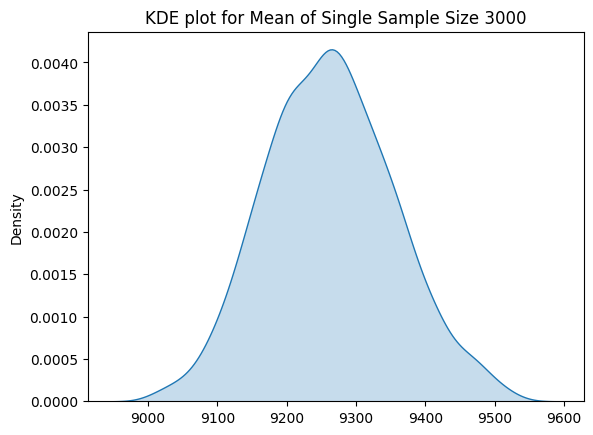

In [ ]:
sns.kdeplot(x = single_s3000,fill=True)
plt.title("KDE plot for Mean of Single Sample Size 3000")
plt.show()

In [ ]:
married_s3000 = [np.mean(married.sample(3000)).round(2) for i in range(1000)]

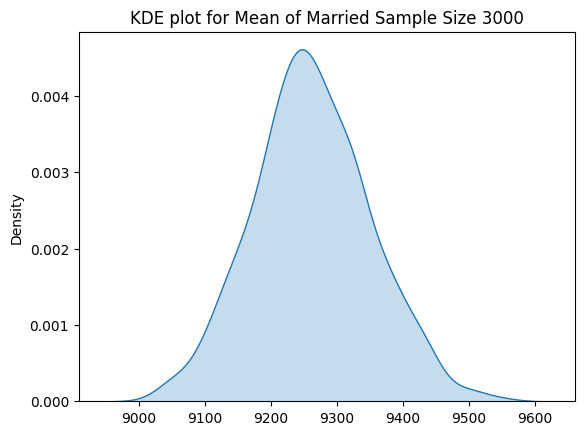

In [ ]:
sns.kdeplot(x = married_s3000,fill=True)
plt.title("KDE plot for Mean of Married Sample Size 3000")
plt.show()

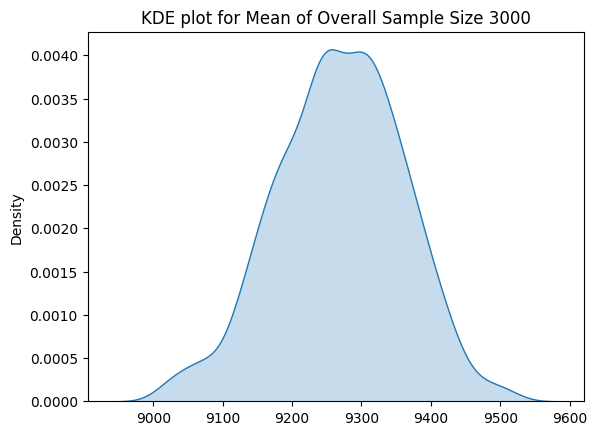

In [ ]:
sns.kdeplot(x = overall_s3000,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 3000")
plt.show()

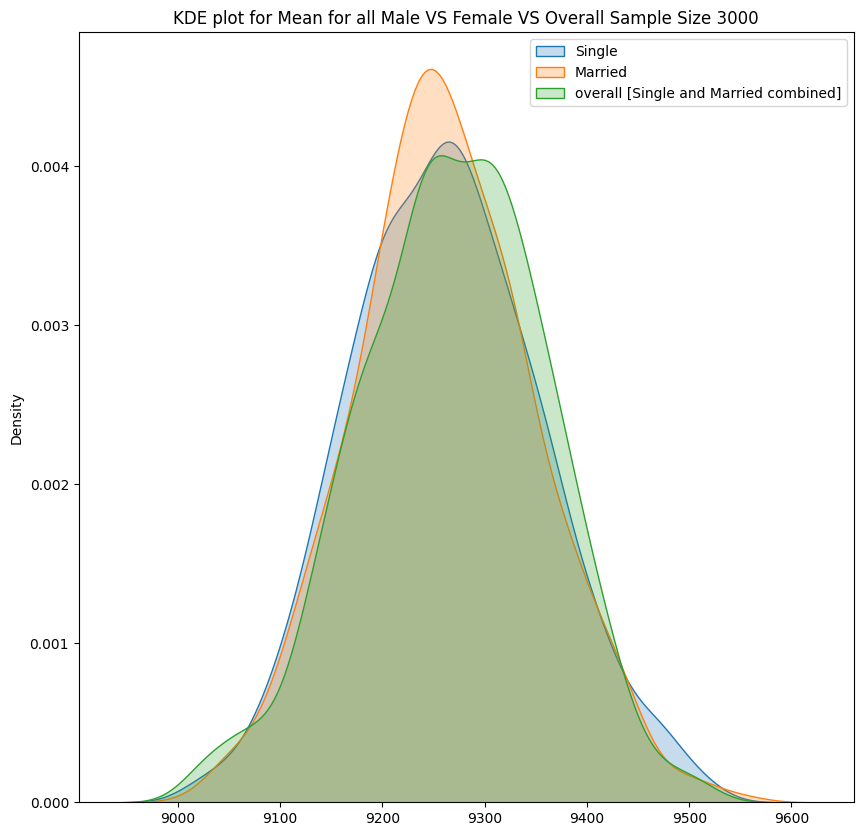

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = single_s3000,label='Single',fill=True)
sns.kdeplot(x = married_s3000,label='Married',fill=True)
sns.kdeplot(x = overall_s3000, label='overall [Single and Married combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Male VS Female VS Overall Sample Size 3000")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 3000 Sample size Mean Data

In [ ]:
p_o = np.mean(overall_s3000)
p_o

9268.20702

In [ ]:
se_o= np.std(overall)/np.sqrt(3000)
se_o

91.7081241064743

* Observation: For **Overall** with **sample size 3000**
  * **Mean: 9268.20**
  * **Standard Error: 91.7**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[9117.365497469671, 9419.048542530329]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **9117 to 9419**

**Single** 3000 Sample Mean Data

In [ ]:
p_s = np.mean(single_s3000)
p_s

9262.25296

In [ ]:
se_s= np.std(single)/np.sqrt(3000)
se_s

91.78625289378846

* Observation: For **Single** with **sample size 3000**
  * **Mean: 9262.25**
  * **Standard Error: 91.78**

In [ ]:
[p_s-1.6448*se_s, p_s+1.6448*se_s]

[9111.282931240297, 9413.222988759702]

**90%** of the times, the sample purchase amount average for the **Single** happen to be between **9111 to 9413**

**Married** 3000 Sample Mean Data

In [ ]:
p_ma = np.mean(married_s3000)
p_ma

9261.67105

In [ ]:
se_ma= np.std(married)/np.sqrt(3000)
se_ma

91.59539217527643

* Observation: For Married with sample size 3000
  * **Mean: 9261.67**
  * **Standard Error: 91.59**

In [ ]:
[p_ma-1.6448*se_ma, p_ma+1.6448*se_ma]

[9111.014948950105, 9412.327151049896]

**90%** of the times, the sample purchase amount average for the **Married** happen to be between **9111 to 9412**

# For **95 Percent Confidence Interval.**

**Overall** 3000 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[9088.468267563721, 9447.945772436278]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **9088 to 9447**

**Single** 3000 Sample Mean Data

In [ ]:
[p_s-1.9599*se_s, p_s+1.9599*se_s]

[9082.361082953465, 9442.144837046535]

**95%** of the times, the sample purchase amount average for the **single** happen to be between **9082 to 9442**

**Married** 3000 Sample Mean Data

In [ ]:
[p_ma-1.9599*se_ma, p_ma+1.9599*se_ma]

[9082.153240875676, 9441.188859124326]

**95%** of the times, the sample purchase amount average for the **Married** happen to be between **9082 to 9441**

# For **99 Percent Confidence Interval.**

**Overall** 3000 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[9031.985233926544, 9504.428806073456]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **9031 to 9504**

**Single** 3000 Sample Mean Data

In [ ]:
[p_s-2.5758*se_s, p_s+2.5758*se_s]

[9025.82992979618, 9498.67599020382]

**99%** of the times, the sample purchase amount average for the **Single** happen to be between **9025 to 9498**

**Married** 3000 Sample Mean Data

In [ ]:
[p_ma-2.5758*se_ma, p_ma+2.5758*se_ma]

[9025.739638834924, 9497.602461165077]

**99%** of the times, the sample purchase amount average for the **Married** happen to be between **9025 to 9497**

* Observation:3000
* For **Overall** with **sample size 3000**
  * **Mean: 9268.20**
  * **Standard Error: 91.7**
* For **Single** with **sample size 3000**
  * **Mean: 9262.25**
  * **Standard Error: 91.78**
* * Observation: For Married with sample size 3000
  * **Mean: 9261.67**
  * **Standard Error: 91.59**

  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **9117 to 9419**.
    * The sample purchase amount average for the **Single** happen to be between **9111 to 9413**.
    * The sample purchase amount average for the **Married** happen to be between ** 9111 to 9412**.
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between ** 9088 to 9447**.
    * The sample purchase amount average for the **Single** happen to be between ** 9082 to 9442**.
    * The sample purchase amount average for the **Married** happen to be between **9082 to 9441**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **9031 to 9504**.
    * The sample purchase amount average for the **Single** happen to be between ** 9025 to 9498**
    * The sample purchase amount average for the **Married** happen to be between **9025 to 9497**

# Sample size 30000

In [ ]:
single_s30000 = [np.mean(single.sample(30000)).round(2) for i in range(1000)]

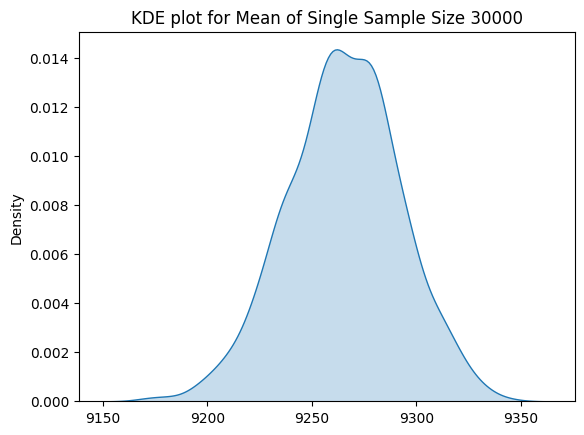

In [ ]:
sns.kdeplot(x = single_s30000,fill=True)
plt.title("KDE plot for Mean of Single Sample Size 30000")
plt.show()

In [ ]:
married_s30000 = [np.mean(married.sample(30000)).round(2) for i in range(1000)]

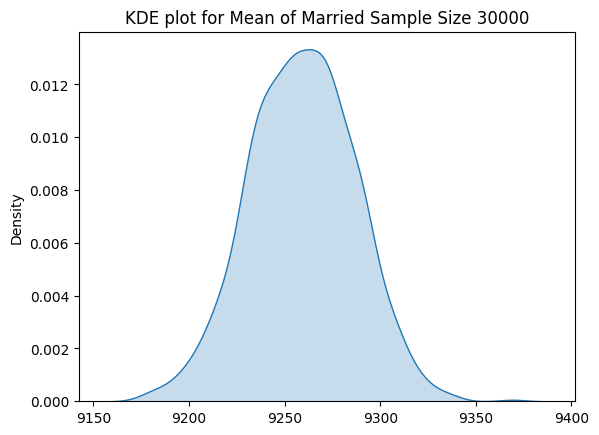

In [ ]:
sns.kdeplot(x = married_s30000,fill=True)
plt.title("KDE plot for Mean of Married Sample Size 30000")
plt.show()

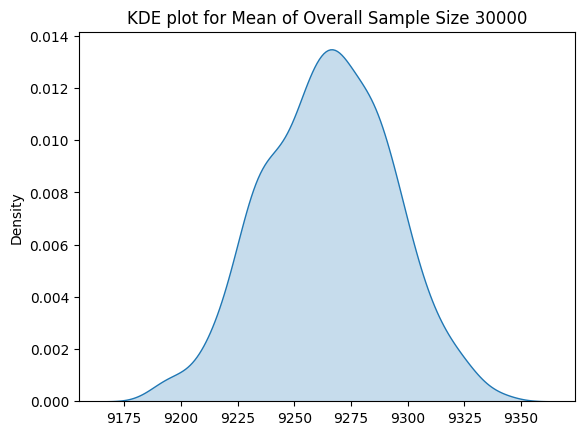

In [ ]:
sns.kdeplot(x = overall_s30000,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 30000")
plt.show()

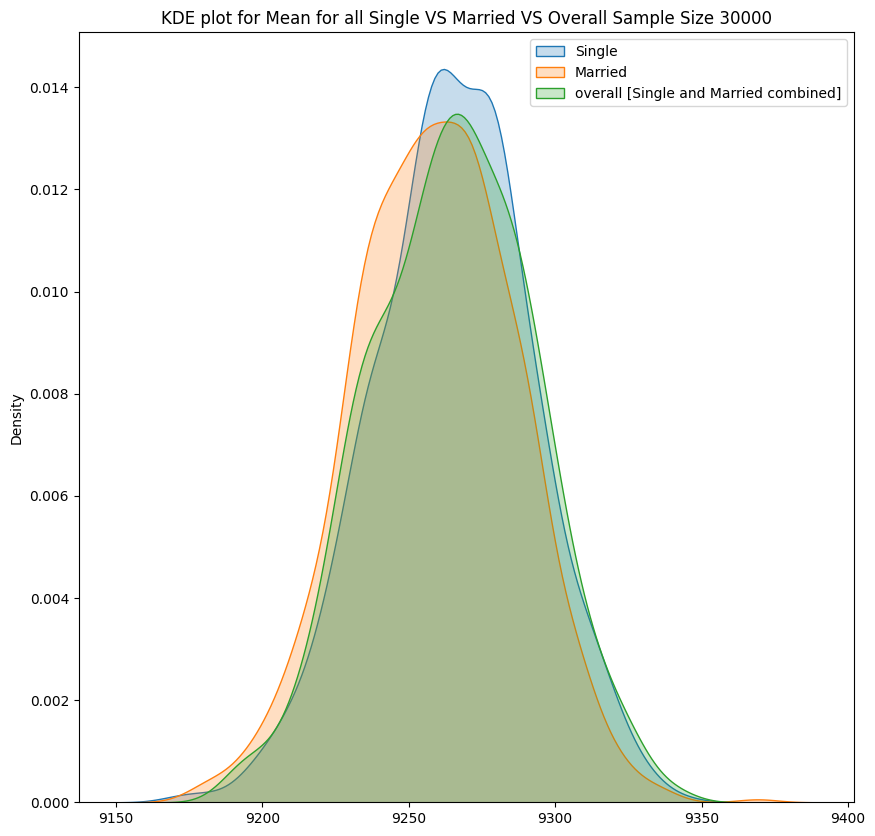

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = single_s30000,label='Single',fill=True)
sns.kdeplot(x = married_s30000,label='Married',fill=True)
sns.kdeplot(x = overall_s30000, label='overall [Single and Married combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Single VS Married VS Overall Sample Size 30000")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 30000 Sample size Mean Data

In [ ]:
p_o = np.mean(overall_s30000)
p_o

9264.818449999999

In [ ]:
se_o= np.std(overall)/np.sqrt(30000)
se_o

29.00065521178529

* Observation: For Overall with sample size 30000
  * **Mean: 9264.81**
  * **Standard Error: 29**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[9217.118172307655, 9312.518727692343]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **9217 to 9312**

**Single** 30000 Sample Mean Data

In [ ]:
p_s = np.mean(single_s30000)
p_s

9265.02858

In [ ]:
se_s= np.std(single)/np.sqrt(30000)
se_s

29.02536170365925

* Observation: For Single with sample size 30000
  * **Mean: 9265.02**
  * **Standard Error: 29.02**

In [ ]:
[p_s-1.6448*se_s, p_s+1.6448*se_s]

[9217.287665069822, 9312.769494930179]

**90%** of the times, the sample purchase amount average for the **Single** happen to be between **9217 to 9312**

**Married** 30000 Sample Mean Data

In [ ]:
p_ma = np.mean(married_s30000)
p_ma

9259.14025

In [ ]:
se_ma= np.std(married)/np.sqrt(30000)
se_ma

28.965006245023826

* Observation: For Married with sample size 30000
  * **Mean: 9259.15**
  * **Standard Error: 28.96**

In [ ]:
[p_ma-1.6448*se_ma, p_ma+1.6448*se_ma]

[9211.498607728185, 9306.781892271816]

**90%** of the times, the sample purchase amount average for the **Married** happen to be between **9211 to 9306**

# For **95 Percent Confidence Interval.**

**Overall** 30000 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[9207.980065850421, 9321.656834149577]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **9207 to 9321**

**single** 30000 Sample Mean Data

In [ ]:
[p_s-1.9599*se_s, p_s+1.9599*se_s]

[9208.141773596999, 9321.915386403001]

**95%** of the times, the sample purchase amount average for the **Single** happen to be between **9208 to 9321**

**Married** 30000 Sample Mean Data

In [ ]:
[p_ma-1.9599*se_ma, p_ma+1.9599*se_ma]

[9202.371734260378, 9315.908765739623]

**95%** of the times, the sample purchase amount average for the **Married** happen to be between **9202 to 9315**

# For **99 Percent Confidence Interval.**

**Overall** 30000 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[9190.118562305483, 9339.518337694515]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **9190 to 9339**

**Single** 30000 Sample Mean Data

In [ ]:
[p_s-2.5758*se_s, p_s+2.5758*se_s]

[9190.265053323714, 9339.792106676286]

**99%** of the times, the sample purchase amount average for the **Single** happen to be between **9190 to 9339**

**Married** 30000 Sample Mean Data

In [ ]:
[p_ma-2.5758*se_ma, p_ma+2.5758*se_ma]

[9184.532186914068, 9333.748313085933]

**99%** of the times, the sample purchase amount average for the **Married** happen to be between **9184 to 9333**

* Observation: 30000
* For Overall with sample size 30000
  * **Mean: 9264.81**
  * **Standard Error: 29**
* For Single with sample size 30000
  * **Mean: 9265.02**
  * **Standard Error: 29.02**
* For Married with sample size 30000
  * **Mean: 9259.15**
  * **Standard Error: 28.96**

  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **9217 to 9312**.
    * The sample purchase amount average for the **Single** happen to be between **9217 to 9312**.
    * The sample purchase amount average for the **Married** happen to be between **9211 to 9306**.
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between **9207 to 9321**.
    * The sample purchase amount average for the **Single** happen to be between **9208 to 9321**.
    * The sample purchase amount average for the **Married** happen to be between **9202 to 9315**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **9190 to 9339**.
    * The sample purchase amount average for the **Single** happen to be between **9190 to 9339**
    * The sample purchase amount average for the **Married** happen to be between **9184 to 9333**

#  <font color="red">Observations:
  * Confidence interval (CI) very narrow and it's highly overlapping
  * There is no significant difference in mean of Married or Single groups when sample size increases

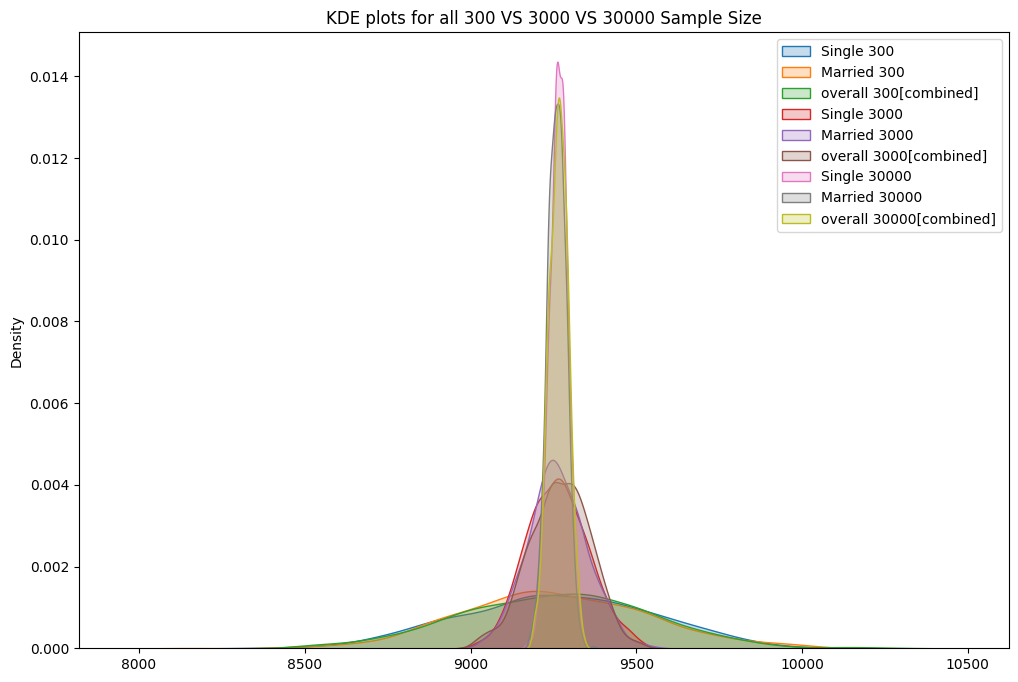

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(x = single_s300,label='Single 300',fill=True)
sns.kdeplot(x = married_s300,label='Married 300',fill=True)
sns.kdeplot(x = overall_s300, label='overall 300[combined]',fill=True)
sns.kdeplot(x = single_s3000,label='Single 3000',fill=True)
sns.kdeplot(x = married_s3000,label='Married 3000',fill=True)
sns.kdeplot(x = overall_s3000, label='overall 3000[combined]',fill=True)
sns.kdeplot(x = single_s30000,label='Single 30000',fill=True)
sns.kdeplot(x = married_s30000,label='Married 30000',fill=True)
sns.kdeplot(x = overall_s30000, label='overall 30000[combined]',fill=True)
plt.legend()
plt.title("KDE plots for all 300 VS 3000 VS 30000 Sample Size")
plt.show()

#  <font color="red">Observation:(Do the confidence intervals for different sample sizes overlap?)
  * **Confidence interval overlaps, as the sample size increases mean distribution is narrower**

# **6. How does Age affect the amount spent?**

---



In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
list(df['Age'].unique())

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

* Let Consider:
  * 0-17:- age1
  * 18-25:- age2
  * 26-35:- age3
  * 36-45:- age4
  * 46-50:- age5
  * 51-55:- age6
  * 55+:- age7

In [ ]:
age1 = df[df['Age']=='0-17']['Purchase']
age2 = df[df['Age']=='18-25']['Purchase']
age3 = df[df['Age']=='26-35']['Purchase']
age4 = df[df['Age']=='36-45']['Purchase']
age5 = df[df['Age']=='46-50']['Purchase']
age6 = df[df['Age']=='51-55']['Purchase']
age7 = df[df['Age']=='55+']['Purchase']

In [ ]:
age1.mean(), age1.std()

(8933.464640444974, 5111.11404600277)

In [ ]:
age2.mean(), age2.std()

(9169.663606261289, 5034.32199717658)

In [ ]:
age3.mean(), age3.std()

(9252.690632869888, 5010.527303002956)

In [ ]:
age4.mean(), age4.std()

(9331.350694917874, 5022.923879204662)

In [ ]:
age5.mean(), age5.std()

(9208.625697468327, 4967.216367142941)

In [ ]:
age6.mean(), age6.std()

(9534.808030960236, 5087.368079602135)

In [ ]:
age7.mean(), age7.std()

(9336.280459449405, 5011.4939956034605)

In [ ]:
overall.mean(), overall.std()

(9263.968712959126, 5023.065393820582)

* Observation:
  * **0-17** Age Group Dataset:
    * **Mean:- 8933.46**, **Standard Deviation:- 5111.11**
  * **18-25** Age Group Dataset:
    * **Mean:- 9169.66**, **Standard Deviation:- 5034.32**
  * **26-35** Age Group Dataset:
    * **Mean:- 9252.69**, **Standard Deviation:- 5010.52**
  * **36-45** Age Group Dataset:
    * **Mean:- 9331.35**, **Standard Deviation:- 5022.92**
  * **46-50** Age Group Dataset:
    * **Mean:- 9208.62**, **Standard Deviation:- 4967.21**
  * **51-55** Age Group Dataset:
    * **Mean:- 9534.80**, **Standard Deviation:- 5087.36**
  * **55+** Age Group Dataset:
    * **Mean:- 9336.28**, **Standard Deviation:- 5011.49**
  * **Overall** Dataset:
    * **Mean:- 9263.96**, **Standard Deviation:- 5023.06**


# Sample size 300

In [ ]:
age1_s300 = [np.mean(age1.sample(300)).round(2) for i in range(1000)]

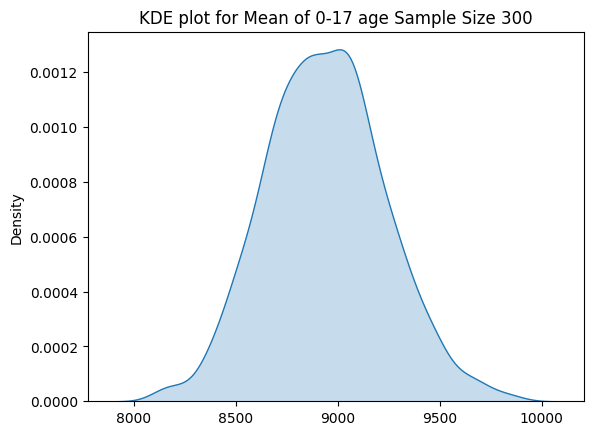

In [ ]:
sns.kdeplot(x = age1_s300,fill=True)
plt.title("KDE plot for Mean of 0-17 age Sample Size 300")
plt.show()

In [ ]:
age2_s300 = [np.mean(age2.sample(300)).round(2) for i in range(1000)]

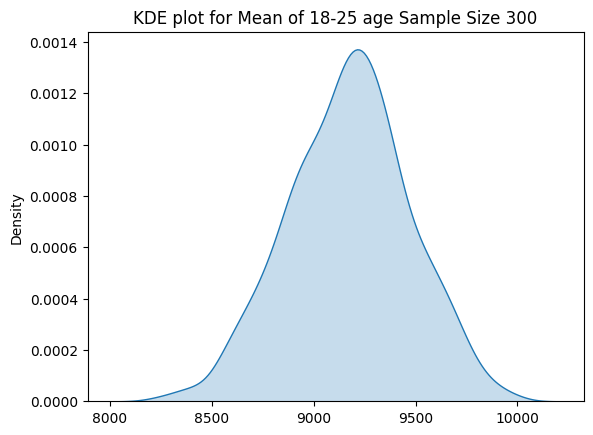

In [ ]:
sns.kdeplot(x = age2_s300,fill=True)
plt.title("KDE plot for Mean of 18-25 age Sample Size 300")
plt.show()

In [ ]:
age3_s300 = [np.mean(age3.sample(300)).round(2) for i in range(1000)]

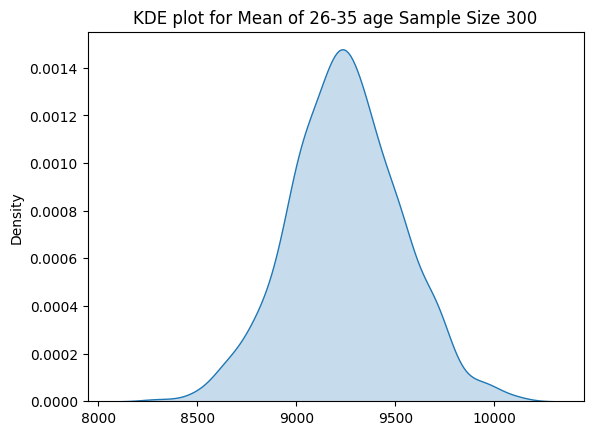

In [ ]:
sns.kdeplot(x = age3_s300,fill=True)
plt.title("KDE plot for Mean of 26-35 age Sample Size 300")
plt.show()

In [ ]:
age4_s300 = [np.mean(age4.sample(300)).round(2) for i in range(1000)]

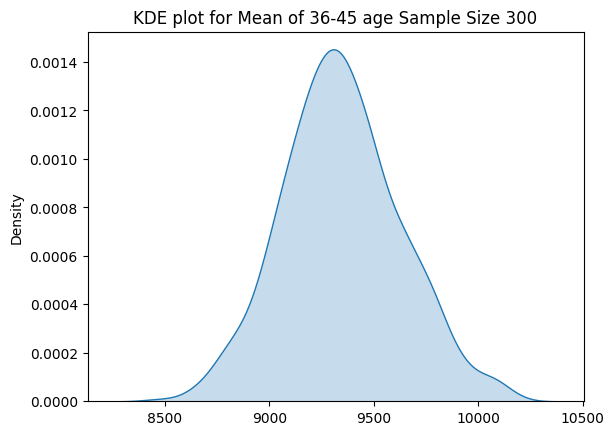

In [ ]:
sns.kdeplot(x = age4_s300,fill=True)
plt.title("KDE plot for Mean of 36-45 age Sample Size 300")
plt.show()

In [ ]:
age5_s300 = [np.mean(age5.sample(300)).round(2) for i in range(1000)]

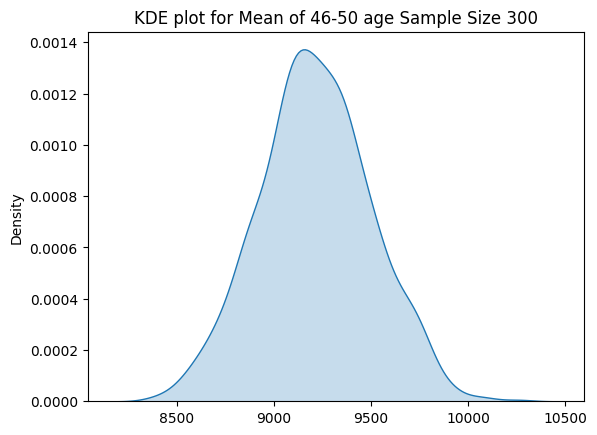

In [ ]:
sns.kdeplot(x = age5_s300,fill=True)
plt.title("KDE plot for Mean of 46-50 age Sample Size 300")
plt.show()

In [ ]:
age6_s300 = [np.mean(age6.sample(300)).round(2) for i in range(1000)]

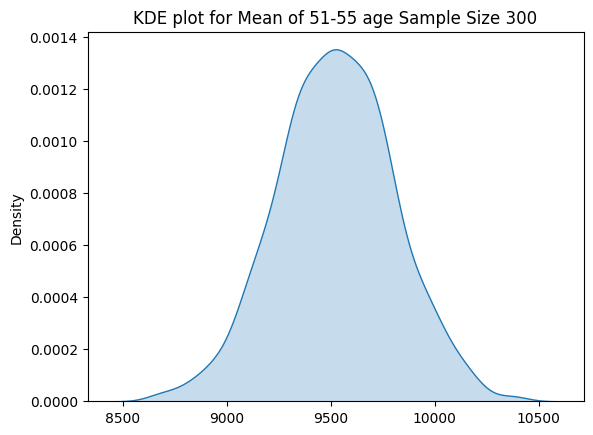

In [ ]:
sns.kdeplot(x = age6_s300,fill=True)
plt.title("KDE plot for Mean of 51-55 age Sample Size 300")
plt.show()

In [ ]:
age7_s300 = [np.mean(age7.sample(300)).round(2) for i in range(1000)]

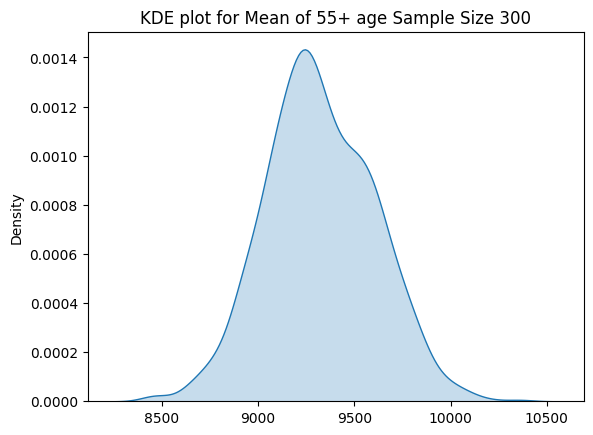

In [ ]:
sns.kdeplot(x = age7_s300,fill=True)
plt.title("KDE plot for Mean of 55+ age Sample Size 300")
plt.show()

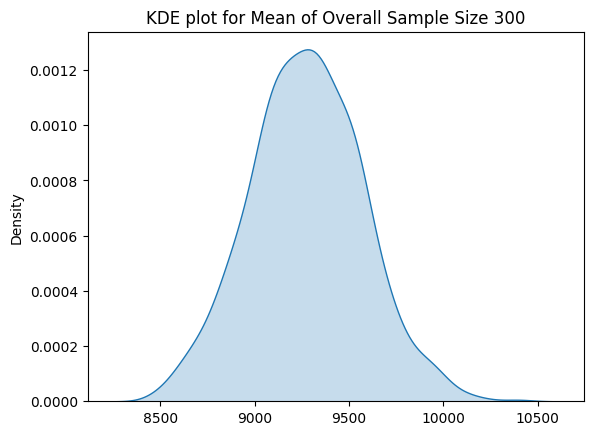

In [ ]:
sns.kdeplot(x = overall_s300,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 300")
plt.show()

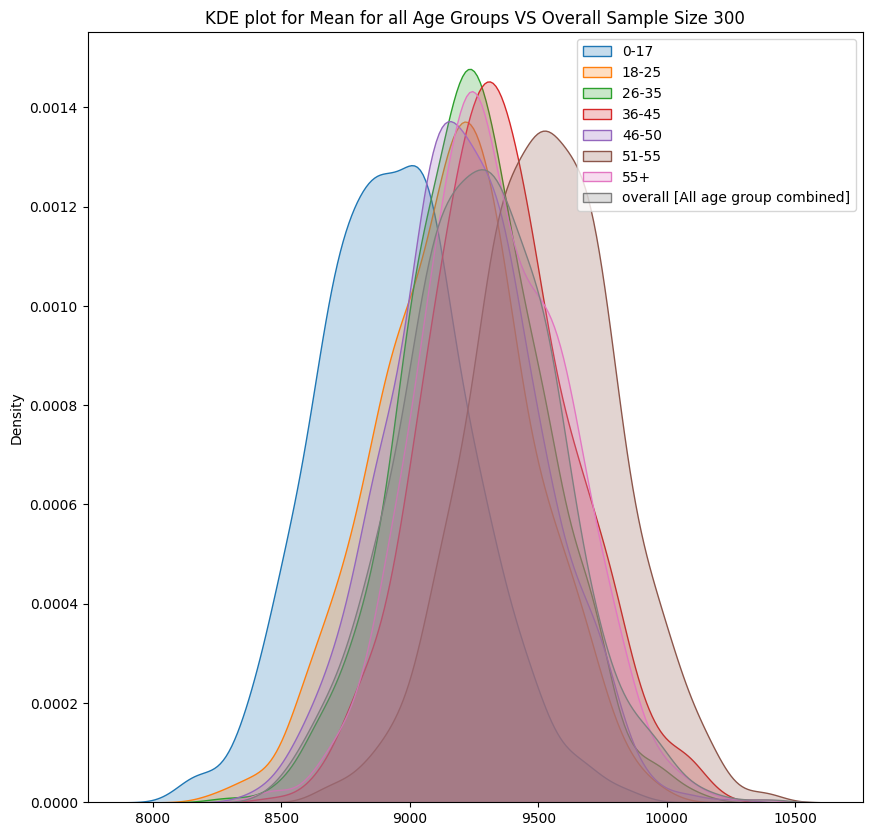

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = age1_s300,label='0-17',fill=True)
sns.kdeplot(x = age2_s300,label='18-25',fill=True)
sns.kdeplot(x = age3_s300,label='26-35',fill=True)
sns.kdeplot(x = age4_s300,label='36-45',fill=True)
sns.kdeplot(x = age5_s300,label='46-50',fill=True)
sns.kdeplot(x = age6_s300,label='51-55',fill=True)
sns.kdeplot(x = age7_s300,label='55+',fill=True)
sns.kdeplot(x = overall_s300, label='overall [All age group combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Age Groups VS Overall Sample Size 300")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 300 Sample Mean Data

In [ ]:
p_o = np.mean(overall_s300)
p_o

9273.64759

In [ ]:
se_o= np.std(overall)/np.sqrt(300)
se_o

290.0065521178529

* Observation: For Overall with sample size 300
  * **Mean: 9273.64**
  * **Standard Error: 290**

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[8796.644813076557, 9750.650366923444]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **9273 to 9750**

**'0-17'** 300 Sample Mean Data

In [ ]:
p_1 = np.mean(age1_s300)
p_1

8938.017870000001

In [ ]:
se_1= np.std(age1)/np.sqrt(300)
se_1

295.0805369619282

In [ ]:
[p_1-1.6448*se_1, p_1+1.6448*se_1]

[8452.669402805022, 9423.36633719498]

**90%** of the times, the sample purchase amount average for the **0-17** happen to be between **8452 to 9423**

**"18-25"** 300 Sample Mean Data

In [ ]:
p_2 = np.mean(age2_s300)
p_2

9171.67553

In [ ]:
se_2= np.std(age2)/np.sqrt(300)
se_2

290.65525778045566

In [ ]:
[p_2-1.6448*se_2, p_2+1.6448*se_2]

[8693.605762002708, 9649.745297997293]

**90%** of the times, the sample purchase amount average for the **18-25** happen to be between **8693.60-9649.74**

**"26-35"** 300 Sample Mean Data

In [ ]:
p_3 = np.mean(age3_s300)
p_3

9246.76232

In [ ]:
se_3= np.std(age3)/np.sqrt(300)
se_3

289.28227001856567

In [ ]:
[p_3-1.6448*se_3, p_3+1.6448*se_3]

[8770.950842273463, 9722.573797726536]

**90%** of the times, the sample purchase amount average for the **26-35** happen to be between **8770.95-9722.57**

**"36-45"** 300 Sample Mean Data

In [ ]:
p_4 = np.mean(age4_s300)
p_4

9344.946759999999

In [ ]:
se_4= np.std(age4)/np.sqrt(300)
se_4

289.997327354891

In [ ]:
[p_4-1.6448*se_4, p_4+1.6448*se_4]

[8867.959155966673, 9821.934364033325]

**90%** of the times, the sample purchase amount average for the **36-45** happen to be between **8867.95, 9821.93**

**"46-50"** 300 Sample Mean Data

In [ ]:
p_5 = np.mean(age5_s300)
p_5

9212.63889

In [ ]:
se_5= np.std(age5)/np.sqrt(300)
se_5

286.77923305810276

In [ ]:
[p_5-1.6448*se_5, p_5+1.6448*se_5]

[8740.944407466033, 9684.333372533967]

**90%** of the times, the sample purchase amount average for the **46-50** happen to be between **8740.94, 9684.33**

**"51-55"** 300 Sample Mean Data

In [ ]:
p_6 = np.mean(age6_s300)
p_6

9522.681379999998

In [ ]:
se_6= np.std(age6)/np.sqrt(300)
se_6

293.71551856001525

In [ ]:
[p_6-1.6448*se_6, p_6+1.6448*se_6]

[9039.578095072486, 10005.78466492751]

**90%** of the times, the sample purchase amount average for the **51-55** happen to be between **9039.57-10005.78**

**"55+"** 300 Sample Mean Data

In [ ]:
p_7 = np.mean(age7_s300)
p_7

9321.45452

In [ ]:
se_7= np.std(age7)/np.sqrt(300)
se_7

289.33201310588464

In [ ]:
[p_7-1.6448*se_7, p_7+1.6448*se_7]

[8845.56122484344, 9797.347815156558]

**90%** of the times, the sample purchase amount average for the **55+** happen to be between **8845.56, 9797.34**

# For **95 Percent Confidence Interval.**

**Overall** 300 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[8705.263748504221, 9842.03143149578]

**95%** of the times, the sample purchase amount average for the **overall data** happen to be between **8845.56, 9797.34**

**"0-17"** 300 Sample Mean Data

In [ ]:
[p_1-1.9599*se_1, p_1+1.9599*se_1]

[8359.689525608319, 9516.346214391684]

**95%** of the times, the sample purchase amount average for the **0-17** happen to be between **8359.68, 9516.34**

**"18-25"** 300 Sample Mean Data

In [ ]:
[p_2-1.9599*se_2, p_2+1.9599*se_2]

[8602.020290276085, 9741.330769723916]

**95%** of the times, the sample purchase amount average for the **18-25** happen to be between **8602.025, 9741.33**

**"26-35"** 300 Sample Mean Data

In [ ]:
[p_3-1.9599*se_3, p_3+1.9599*se_3]

[8679.797998990613, 9813.726641009387]

**95%** of the times, the sample purchase amount average for the **26-35** happen to be between **8679.79, 9813.72**

**"36-45"** 300 Sample Mean Data

In [ ]:
[p_4-1.9599*se_4, p_4+1.9599*se_4]

[8776.580998117148, 9913.31252188285]

**95%** of the times, the sample purchase amount average for the **36-45** happen to be between **8776.58, 9913.31**

**"46-50"** 300 Sample Mean Data

In [ ]:
[p_5-1.9599*se_5, p_5+1.9599*se_5]

[8650.580271129424, 9774.697508870577]

**95%** of the times, the sample purchase amount average for the **46-50** happen to be between **8650.58, 9774.69**

**"51-55"** 300 Sample Mean Data

In [ ]:
[p_6-1.9599*se_6, p_6+1.9599*se_6]

[8947.028335174224, 10098.334424825773]

**95%** of the times, the sample purchase amount average for the **51-55** happen to be between **8947.02, 10098.33**

**"55+"** 300 Sample Mean Data

In [ ]:
[p_7-1.9599*se_7, p_7+1.9599*se_7]

[8754.392707513776, 9888.516332486222]

**95%** of the times, the sample purchase amount average for the **55+** happen to be between **8754.39, 9888.51**

# For **99 Percent Confidence Interval.**

**Overall** 300 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[8526.648713054836, 10020.646466945165]

**99%** of the times, the sample purchase amount average for the **overall data** happen to be between **8517 to 10011**

**"0-17"** 300 Sample Mean Data

In [ ]:
[p_1-2.5758*se_1, p_1+2.5758*se_1]

[8177.949422893467, 9698.086317106536]

**99%** of the times, the sample purchase amount average for the **0-17** happen to be between **8177.949422893467, 9698.086317106536**

**"18-25"** 300 Sample Mean Data

In [ ]:
[p_2-2.5758*se_2, p_2+2.5758*se_2]

[8423.005717009102, 9920.345342990899]

**99%** of the times, the sample purchase amount average for the **18-25** happen to be between **8423.005717009102, 9920.345342990899**

**"26-35"** 300 Sample Mean Data

In [ ]:
[p_3-2.5758*se_3, p_3+2.5758*se_3]

[8501.629048886178, 9991.895591113822]

**99%** of the times, the sample purchase amount average for the **26-35** happen to be between **8501.629048886178, 9991.895591113822**

**"36-45"** 300 Sample Mean Data

In [ ]:
[p_4-2.5758*se_4, p_4+2.5758*se_4]

[8597.971644199271, 10091.921875800726]

**99%** of the times, the sample purchase amount average for the **36-45** happen to be between **88597.971644199271, 10091.921875800726**

**"46-50"** 300 Sample Mean Data

In [ ]:
[p_5-2.5758*se_5, p_5+2.5758*se_5]

[8473.952941488938, 9951.324838511062]

**99%** of the times, the sample purchase amount average for the **46-50** happen to be between **8473.952941488938, 9951.324838511062**

**"51-55"** 300 Sample Mean Data

In [ ]:
[p_6-2.5758*se_6, p_6+2.5758*se_6]

[8766.128947293111, 10279.233812706885]

**99%** of the times, the sample purchase amount average for the **51-55** happen to be between **8766.128947293111, 10279.233812706885**

**"55+"** 300 Sample Mean Data

In [ ]:
[p_7-2.5758*se_7, p_7+2.5758*se_7]

[8576.193120641861, 10066.715919358137]

**99%** of the times, the sample purchase amount average for the **55+** happen to be between **8576.193120641861, 10066.715919358137**

* Observation:
  * Z value:
    * 90% :- (+/-)1.6448
    * 95% :- (+/-)1.9599
    * 99% :- (+/-)2.5758
  * For **90 Percent Confidence Interval**:-
    *  The sample purchase amount average for the **overall data** happen to be between **8787 to 9741**.
    * The sample purchase amount average for the **Male** happen to be between **8955 to 9922**.
    * The sample purchase amount average for the **Female** happen to be between **8279 to 9184**.
  * For **95 Percent Confidence Interval.**:-
    * The sample purchase amount average for the **overall data** happen to be between **8696 to 9833**.
    * The sample purchase amount average for the **Male** happen to be between **8862 to 10014**.
    * The sample purchase amount average for the **Female** happen to be between **8192 to 9271**.
  * For **99 Percent Confidence Interval**:-
    * The sample purchase amount average for the **overall data** happen to be between **8517 to 10011**.
    * The sample purchase amount average for the **overall data** happen to be between **8517 to 10011**
    * The sample purchase amount average for the **Female** happen to be between **8023 to 9440**

# Sample size 3000

In [ ]:
age1_s3000 = [np.mean(age1.sample(3000)).round(2) for i in range(1000)]

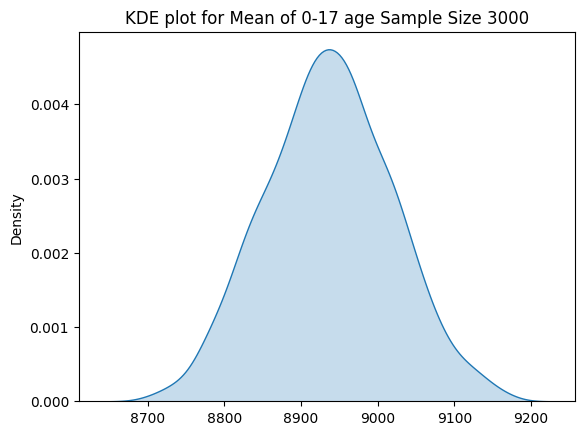

In [ ]:
sns.kdeplot(x = age1_s3000,fill=True)
plt.title("KDE plot for Mean of 0-17 age Sample Size 3000")
plt.show()

In [ ]:
age2_s3000 = [np.mean(age2.sample(3000)).round(2) for i in range(1000)]

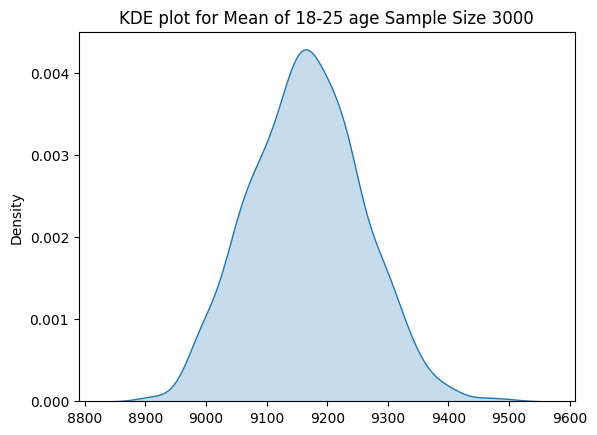

In [ ]:
sns.kdeplot(x = age2_s3000,fill=True)
plt.title("KDE plot for Mean of 18-25 age Sample Size 3000")
plt.show()

In [ ]:
age3_s3000 = [np.mean(age3.sample(3000)).round(2) for i in range(1000)]

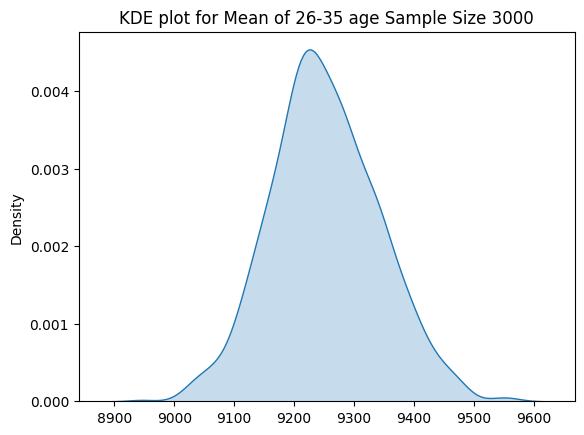

In [ ]:
sns.kdeplot(x = age3_s3000,fill=True)
plt.title("KDE plot for Mean of 26-35 age Sample Size 3000")
plt.show()

In [ ]:
age4_s3000 = [np.mean(age4.sample(3000)).round(2) for i in range(1000)]

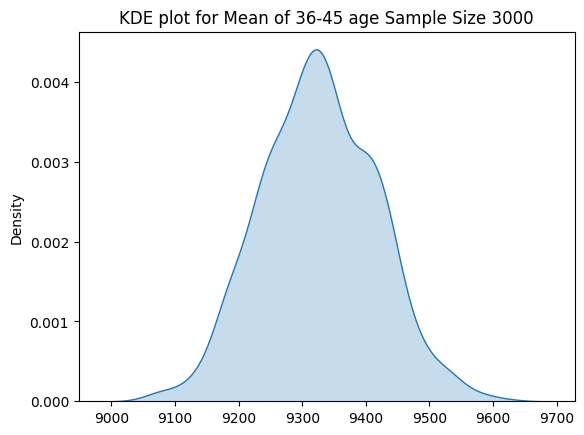

In [ ]:
sns.kdeplot(x = age4_s3000,fill=True)
plt.title("KDE plot for Mean of 36-45 age Sample Size 3000")
plt.show()

In [ ]:
age5_s3000 = [np.mean(age5.sample(3000)).round(2) for i in range(1000)]

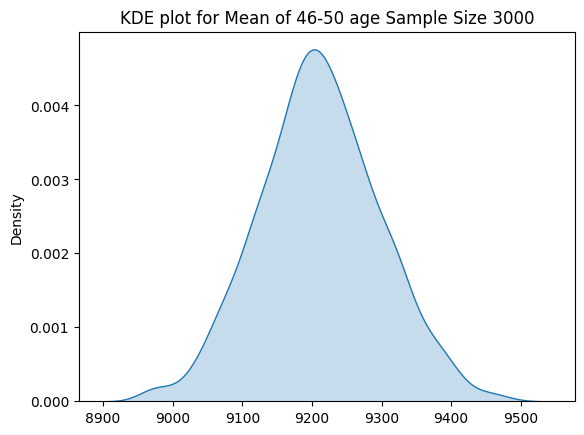

In [ ]:
sns.kdeplot(x = age5_s3000,fill=True)
plt.title("KDE plot for Mean of 46-50 age Sample Size 3000")
plt.show()

In [ ]:
age6_s3000 = [np.mean(age6.sample(3000)).round(2) for i in range(1000)]

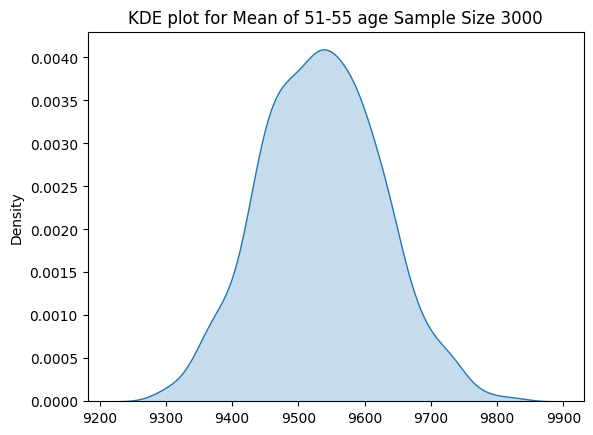

In [ ]:
sns.kdeplot(x = age6_s3000,fill=True)
plt.title("KDE plot for Mean of 51-55 age Sample Size 3000")
plt.show()

In [ ]:
age7_s3000 = [np.mean(age7.sample(3000)).round(2) for i in range(1000)]

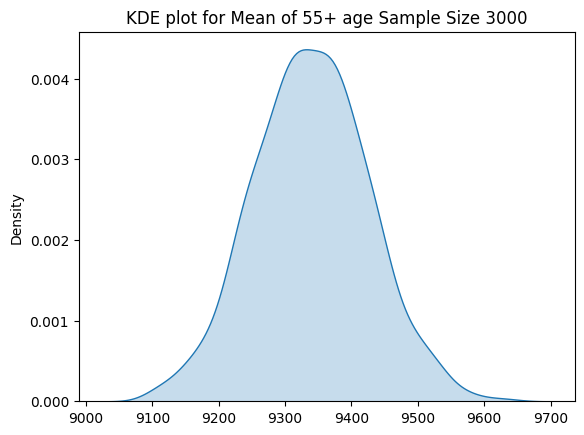

In [ ]:
sns.kdeplot(x = age7_s3000,fill=True)
plt.title("KDE plot for Mean of 55+ age Sample Size 3000")
plt.show()

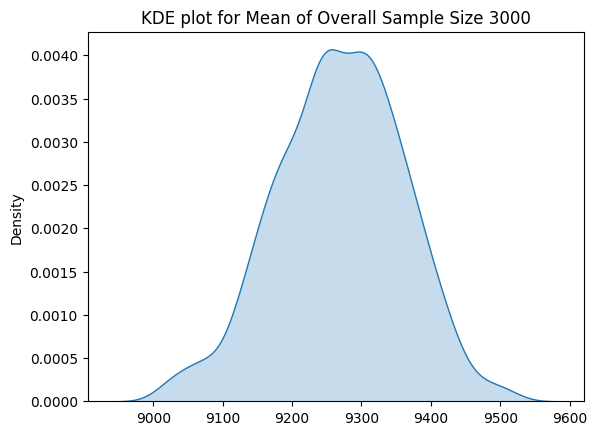

In [ ]:
sns.kdeplot(x = overall_s3000,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 3000")
plt.show()

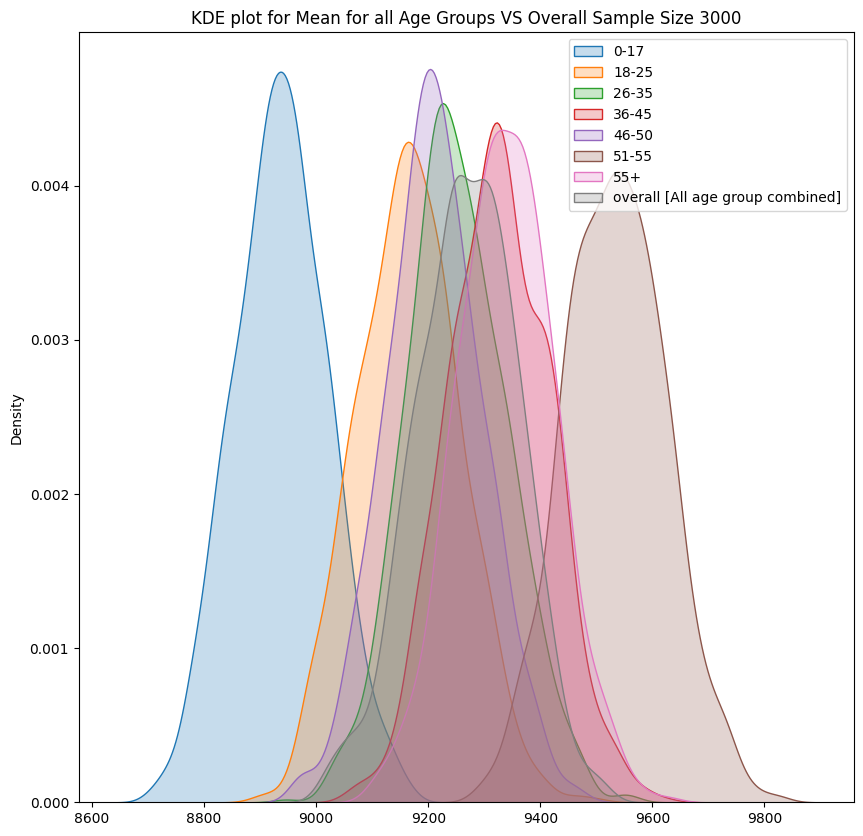

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = age1_s3000,label='0-17',fill=True)
sns.kdeplot(x = age2_s3000,label='18-25',fill=True)
sns.kdeplot(x = age3_s3000,label='26-35',fill=True)
sns.kdeplot(x = age4_s3000,label='36-45',fill=True)
sns.kdeplot(x = age5_s3000,label='46-50',fill=True)
sns.kdeplot(x = age6_s3000,label='51-55',fill=True)
sns.kdeplot(x = age7_s3000,label='55+',fill=True)
sns.kdeplot(x = overall_s3000, label='overall [All age group combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Age Groups VS Overall Sample Size 3000")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 3000 Sample Mean Data

In [ ]:
p_o = np.mean(overall_s3000)
p_o

9268.20702

In [ ]:
se_o= np.std(overall)/np.sqrt(3000)
se_o

91.7081241064743

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[9117.365497469671, 9419.048542530329]

**90%** of the times, the sample purchase amount average for the **overall data** happen to be between **9117.365497469671, 9419.048542530329**

**'0-17'** 3000 Sample Mean Data

In [ ]:
p_1 = np.mean(age1_s3000)
p_1

8936.161960000001

In [ ]:
se_1= np.std(age1)/np.sqrt(3000)
se_1

93.31265899851954

In [ ]:
[p_1-1.6448*se_1, p_1+1.6448*se_1]

[8782.681298479236, 9089.642621520767]

**"18-25"** 3000 Sample Mean Data

In [ ]:
p_2 = np.mean(age2_s3000)
p_2

9165.14085

In [ ]:
se_2= np.std(age2)/np.sqrt(3000)
se_2

91.91326284896165

In [ ]:
[p_2-1.6448*se_2, p_2+1.6448*se_2]

[9013.961915266027, 9316.319784733972]

**"26-35"** 3000 Sample Mean Data

In [ ]:
p_3 = np.mean(age3_s3000)
p_3

9251.28439

In [ ]:
se_3= np.std(age3)/np.sqrt(3000)
se_3

91.47908599625072

In [ ]:
[p_3-1.6448*se_3, p_3+1.6448*se_3]

[9100.819589353367, 9401.749190646635]

**"36-45"** 3000 Sample Mean Data

In [ ]:
p_4 = np.mean(age4_s3000)
p_4

9325.766609999999

In [ ]:
se_4= np.std(age4)/np.sqrt(3000)
se_4

91.70520698029084

In [ ]:
[p_4-1.6448*se_4, p_4+1.6448*se_4]

[9174.929885558817, 9476.60333444118]

**"46-50"** 3000 Sample Mean Data

In [ ]:
p_5 = np.mean(age5_s3000)
p_5

9210.70225

In [ ]:
se_5= np.std(age5)/np.sqrt(3000)
se_5

90.68755620998596

In [ ]:
[p_5-1.6448*se_5, p_5+1.6448*se_5]

[9061.539357545815, 9359.865142454186]

**"51-55"** 3000 Sample Mean Data

In [ ]:
p_6 = np.mean(age6_s3000)
p_6

9534.38785

In [ ]:
se_6= np.std(age6)/np.sqrt(3000)
se_6

92.88100227871074

In [ ]:
[p_6-1.6448*se_6, p_6+1.6448*se_6]

[9381.617177451975, 9687.158522548023]

**"55+"** 3000 Sample Mean Data

In [ ]:
p_7 = np.mean(age7_s3000)
p_7

9338.875989999999

In [ ]:
se_7= np.std(age7)/np.sqrt(3000)
se_7

91.49481614162838

In [ ]:
[p_7-1.6448*se_7, p_7+1.6448*se_7]

[9188.385316410247, 9489.36666358975]

# For **95 Percent Confidence Interval.**

**Overall** 3000 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[9088.468267563721, 9447.945772436278]

**"0-17"** 3000 Sample Mean Data

In [ ]:
[p_1-1.9599*se_1, p_1+1.9599*se_1]

[8753.278479628803, 9119.0454403712]

**"18-25"** 3000 Sample Mean Data

In [ ]:
[p_2-1.9599*se_2, p_2+1.9599*se_2]

[8985.00004614232, 9345.281653857679]

**"26-35"** 3000 Sample Mean Data

In [ ]:
[p_3-1.9599*se_3, p_3+1.9599*se_3]

[9071.994529355949, 9430.574250644053]

**"36-45"** 3000 Sample Mean Data

In [ ]:
[p_4-1.9599*se_4, p_4+1.9599*se_4]

[9146.033574839326, 9505.499645160671]

**"46-50"** 3000 Sample Mean Data

In [ ]:
[p_5-1.9599*se_5, p_5+1.9599*se_5]

[9032.96370858405, 9388.440791415951]

**"51-55"** 3000 Sample Mean Data

In [ ]:
[p_6-1.9599*se_6, p_6+1.9599*se_6]

[9352.350373633953, 9716.425326366045]

**"55+"** 3000 Sample Mean Data

In [ ]:
[p_7-1.9599*se_7, p_7+1.9599*se_7]

[9159.555299844022, 9518.196680155976]

# For **99 Percent Confidence Interval.**

**Overall** 3000 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[9031.985233926544, 9504.428806073456]

**"0-17"** 3000 Sample Mean Data

In [ ]:
[p_1-2.5758*se_1, p_1+2.5758*se_1]

[8695.807212951615, 9176.516707048388]

**"18-25"** 3000 Sample Mean Data

In [ ]:
[p_2-2.5758*se_2, p_2+2.5758*se_2]

[8928.390667553644, 9401.891032446356]

**"26-35"** 3000 Sample Mean Data

In [ ]:
[p_3-2.5758*se_3, p_3+2.5758*se_3]

[9015.652560290859, 9486.916219709143]

**"36-45"** 3000 Sample Mean Data

In [ ]:
[p_4-2.5758*se_4, p_4+2.5758*se_4]

[9089.552337860165, 9561.980882139833]

**"46-50"** 3000 Sample Mean Data

In [ ]:
[p_5-2.5758*se_5, p_5+2.5758*se_5]

[8977.109242714318, 9444.295257285683]

**"51-55"** 3000 Sample Mean Data

In [ ]:
[p_6-2.5758*se_6, p_6+2.5758*se_6]

[9295.144964330497, 9773.630735669502]

**"55+"** 3000 Sample Mean Data

In [ ]:
[p_7-2.5758*se_7, p_7+2.5758*se_7]

[9103.203642582392, 9574.548337417606]

# Sample size 10000

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

* As we can see population value of some age group is less then 30000.
* We will get an error. **ValueError: Cannot take a larger sample than population**
* So we will take **sample of 10000 size**.


In [ ]:
age1_s10000 = [np.mean(age1.sample(10000)).round(2) for i in range(1000)]

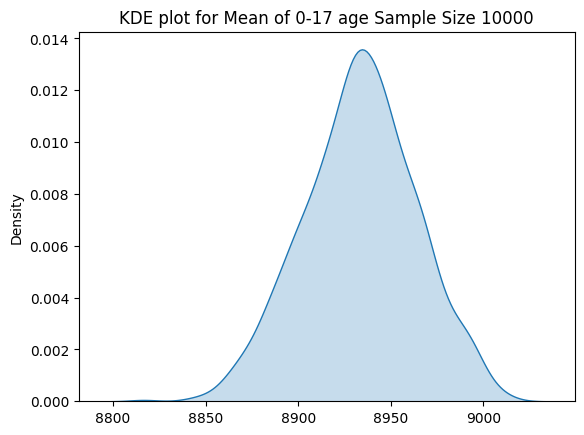

In [ ]:
sns.kdeplot(x = age1_s10000,fill=True)
plt.title("KDE plot for Mean of 0-17 age Sample Size 10000")
plt.show()

In [ ]:
age2_s10000 = [np.mean(age2.sample(10000)).round(2) for i in range(1000)]

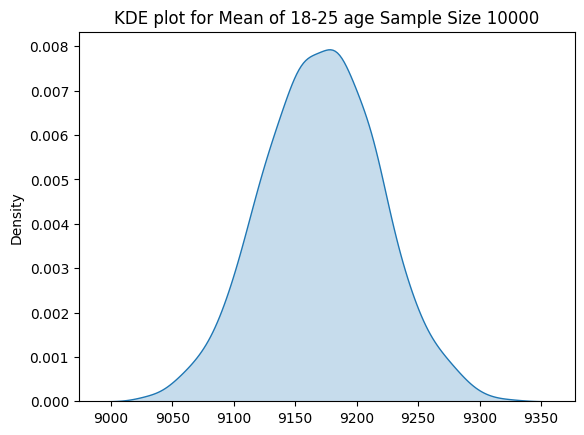

In [ ]:
sns.kdeplot(x = age2_s10000,fill=True)
plt.title("KDE plot for Mean of 18-25 age Sample Size 10000")
plt.show()

In [ ]:
age3_s10000 = [np.mean(age3.sample(10000)).round(2) for i in range(1000)]

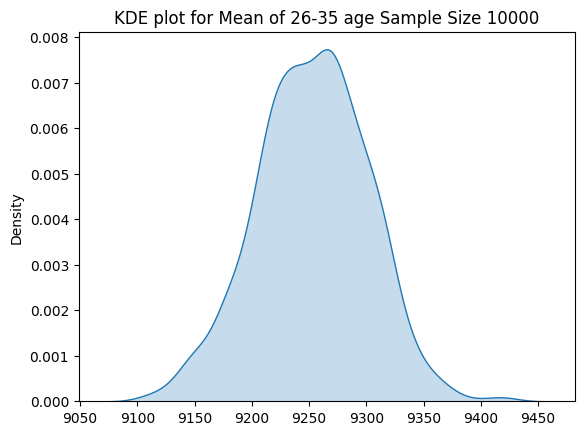

In [ ]:
sns.kdeplot(x = age3_s10000,fill=True)
plt.title("KDE plot for Mean of 26-35 age Sample Size 10000")
plt.show()

In [ ]:
age4_s10000 = [np.mean(age4.sample(10000)).round(2) for i in range(1000)]

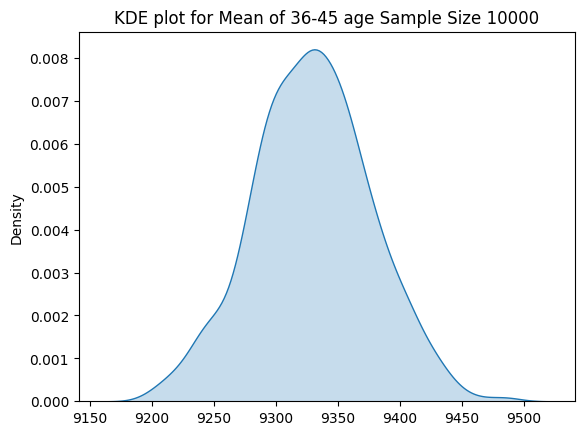

In [ ]:
sns.kdeplot(x = age4_s10000,fill=True)
plt.title("KDE plot for Mean of 36-45 age Sample Size 10000")
plt.show()

In [ ]:
age5_s10000 = [np.mean(age5.sample(10000)).round(2) for i in range(1000)]

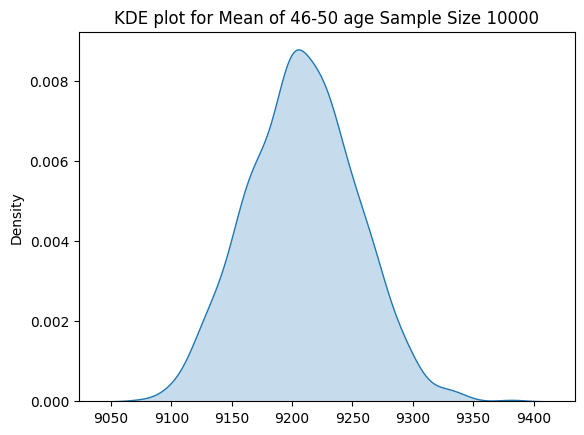

In [ ]:
sns.kdeplot(x = age5_s10000,fill=True)
plt.title("KDE plot for Mean of 46-50 age Sample Size 10000")
plt.show()

In [ ]:
age6_s10000 = [np.mean(age6.sample(10000)).round(2) for i in range(1000)]

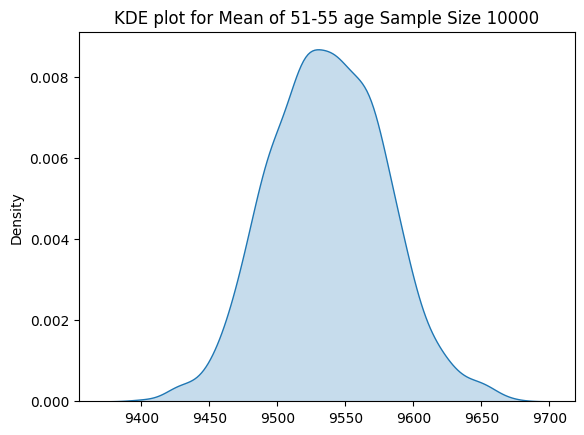

In [ ]:
sns.kdeplot(x = age6_s10000,fill=True)
plt.title("KDE plot for Mean of 51-55 age Sample Size 10000")
plt.show()

In [ ]:
age7_s10000 = [np.mean(age7.sample(10000)).round(2) for i in range(1000)]

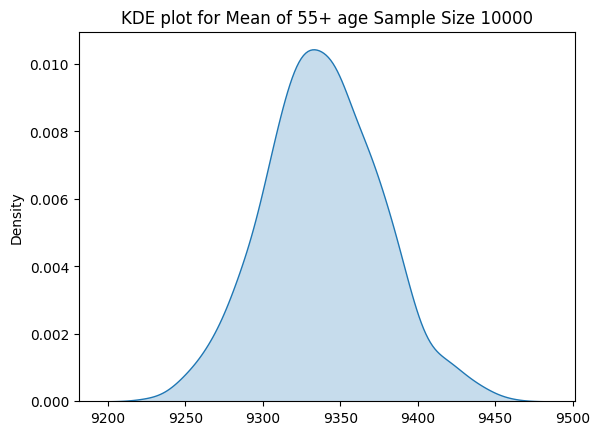

In [ ]:
sns.kdeplot(x = age7_s10000,fill=True)
plt.title("KDE plot for Mean of 55+ age Sample Size 10000")
plt.show()

In [ ]:
overall_s10000 = [np.mean(overall.sample(10000)).round(2) for i in range(1000)]

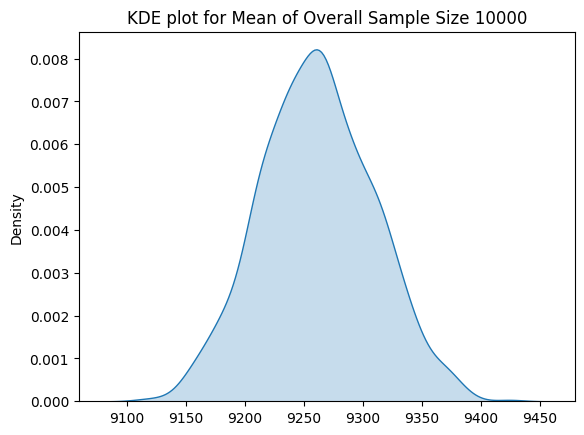

In [ ]:
sns.kdeplot(x = overall_s10000,fill=True)
plt.title("KDE plot for Mean of Overall Sample Size 10000")
plt.show()

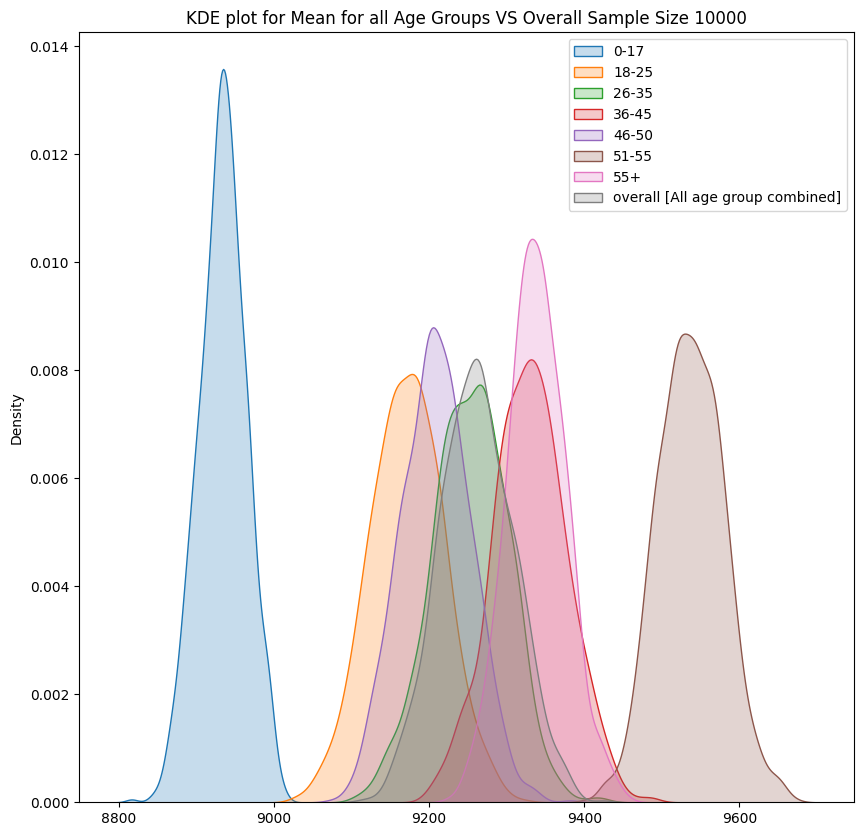

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.kdeplot(x = age1_s10000,label='0-17',fill=True)
sns.kdeplot(x = age2_s10000,label='18-25',fill=True)
sns.kdeplot(x = age3_s10000,label='26-35',fill=True)
sns.kdeplot(x = age4_s10000,label='36-45',fill=True)
sns.kdeplot(x = age5_s10000,label='46-50',fill=True)
sns.kdeplot(x = age6_s10000,label='51-55',fill=True)
sns.kdeplot(x = age7_s10000,label='55+',fill=True)
sns.kdeplot(x = overall_s10000, label='overall [All age group combined]',fill=True)
plt.legend()
plt.title("KDE plot for Mean for all Age Groups VS Overall Sample Size 10000")
plt.show()

# For **90 Percent Confidence Interval**.

**Overall** 10000 Sample Mean Data

In [ ]:
p_o = np.mean(overall_s10000)
p_o

9261.046880000002

In [ ]:
se_o= np.std(overall)/np.sqrt(10000)
se_o

50.23060827959928

In [ ]:
[p_o-1.6448*se_o, p_o+1.6448*se_o]

[9178.427575501717, 9343.666184498286]

**'0-17'** 10000 Sample Mean Data

In [ ]:
p_1 = np.mean(age1_s10000)
p_1

8933.291290000001

In [ ]:
se_1= np.std(age1)/np.sqrt(10000)
se_1

51.10944823427658

In [ ]:
[p_1-1.6448*se_1, p_1+1.6448*se_1]

[8849.226469544263, 9017.35611045574]

**"18-25"** 10000 Sample Mean Data

In [ ]:
p_2 = np.mean(age2_s10000)
p_2

9170.913170000002

In [ ]:
se_2= np.std(age2)/np.sqrt(10000)
se_2

50.34296739627784

In [ ]:
[p_2-1.6448*se_2, p_2+1.6448*se_2]

[9088.109057226604, 9253.7172827734]

**"26-35"** 10000 Sample Mean Data

In [ ]:
p_3 = np.mean(age3_s10000)
p_3

9252.67517

In [ ]:
se_3= np.std(age3)/np.sqrt(10000)
se_3

50.105158940101475

In [ ]:
[p_3-1.6448*se_3, p_3+1.6448*se_3]

[9170.262204575321, 9335.08813542468]

**"36-45"** 10000 Sample Mean Data

In [ ]:
p_4 = np.mean(age4_s10000)
p_4

9329.454230000001

In [ ]:
se_4= np.std(age4)/np.sqrt(10000)
se_4

50.22901050378551

In [ ]:
[p_4-1.6448*se_4, p_4+1.6448*se_4]

[9246.837553523375, 9412.070906476627]

**"46-50"** 10000 Sample Mean Data

In [ ]:
p_5 = np.mean(age5_s10000)
p_5

9208.399609999999

In [ ]:
se_5= np.std(age5)/np.sqrt(10000)
se_5

49.67162022122702

In [ ]:
[p_5-1.6448*se_5, p_5+1.6448*se_5]

[9126.699729060125, 9290.099490939872]

**"51-55"** 10000 Sample Mean Data

In [ ]:
p_6 = np.mean(age6_s10000)
p_6

9536.95184

In [ ]:
se_6= np.std(age6)/np.sqrt(10000)
se_6

50.873020111738604

In [ ]:
[p_6-1.6448*se_6, p_6+1.6448*se_6]

[9453.275896520212, 9620.627783479787]

**"55+"** 10000 Sample Mean Data

In [ ]:
p_7 = np.mean(age7_s10000)
p_7

9338.450929999999

In [ ]:
se_7= np.std(age7)/np.sqrt(10000)
se_7

50.11377469555765

In [ ]:
[p_7-1.6448*se_7, p_7+1.6448*se_7]

[9256.023793380746, 9420.878066619252]

# For **95 Percent Confidence Interval.**

**Overall** 10000 Sample Mean Data

In [ ]:
[p_o-1.9599*se_o, p_o+1.9599*se_o]

[9162.599910832814, 9359.49384916719]

**"0-17"** 10000 Sample Mean Data

In [ ]:
[p_1-1.9599*se_1, p_1+1.9599*se_1]

[8833.121882405643, 9033.460697594359]

**"18-25"** 10000 Sample Mean Data

In [ ]:
[p_2-1.9599*se_2, p_2+1.9599*se_2]

[9072.245988200037, 9269.580351799967]

**"26-35"** 10000 Sample Mean Data

In [ ]:
[p_3-1.9599*se_3, p_3+1.9599*se_3]

[9154.474068993295, 9350.876271006706]

**"36-45"** 10000 Sample Mean Data

In [ ]:
[p_4-1.9599*se_4, p_4+1.9599*se_4]

[9231.010392313632, 9427.89806768637]

**"46-50"** 10000 Sample Mean Data

In [ ]:
[p_5-1.9599*se_5, p_5+1.9599*se_5]

[9111.048201528416, 9305.751018471581]

**"51-55"** 10000 Sample Mean Data

In [ ]:
[p_6-1.9599*se_6, p_6+1.9599*se_6]

[9437.245807883004, 9636.657872116995]

**"55+"** 10000 Sample Mean Data

In [ ]:
[p_7-1.9599*se_7, p_7+1.9599*se_7]

[9240.232942974175, 9436.668917025823]

# For **99 Percent Confidence Interval.**

**Overall** 10000 Sample Mean Data

In [ ]:
[p_o-2.5758*se_o, p_o+2.5758*se_o]

[9131.662879193409, 9390.430880806594]

**"0-17"** 10000 Sample Mean Data

In [ ]:
[p_1-2.5758*se_1, p_1+2.5758*se_1]

[8801.64357323815, 9064.939006761851]

**"18-25"** 10000 Sample Mean Data

In [ ]:
[p_2-2.5758*se_2, p_2+2.5758*se_2]

[9041.239754580669, 9300.586585419334]

**"26-35"** 10000 Sample Mean Data

In [ ]:
[p_3-2.5758*se_3, p_3+2.5758*se_3]

[9123.614301602087, 9381.736038397914]

**"36-45"** 10000 Sample Mean Data

In [ ]:
[p_4-2.5758*se_4, p_4+2.5758*se_4]

[9200.074344744351, 9458.834115255651]

**"46-50"** 10000 Sample Mean Data

In [ ]:
[p_5-2.5758*se_5, p_5+2.5758*se_5]

[9080.455450634163, 9336.343769365834]

**"51-55"** 10000 Sample Mean Data

In [ ]:
[p_6-2.5758*se_6, p_6+2.5758*se_6]

[9405.913114796183, 9667.990565203816]

**"55+"** 10000 Sample Mean Data

In [ ]:
[p_7-2.5758*se_7, p_7+2.5758*se_7]

[9209.367869139181, 9467.533990860817]

#  <font color="red">* Observations:
  * **As Sample Size increases Confidence Interval (CI) is becoming narrower.**
  * **Age Groups [0-17] purchase distribution is comparatively less than other age groups**

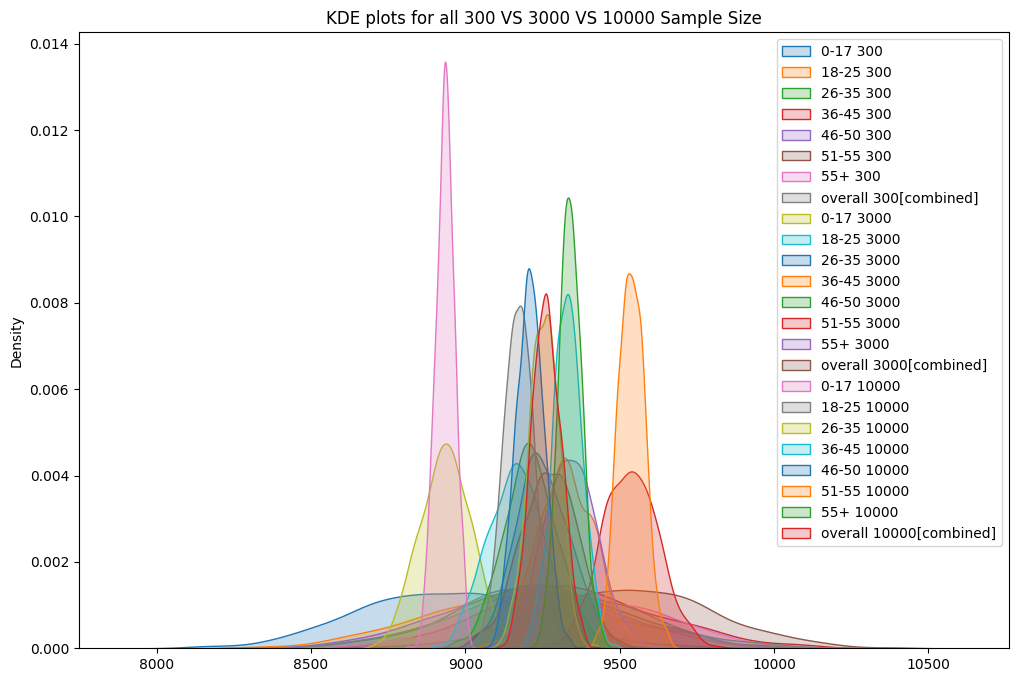

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.kdeplot(x = age1_s300,label='0-17 300',fill=True)
sns.kdeplot(x = age2_s300,label='18-25 300',fill=True)
sns.kdeplot(x = age3_s300,label='26-35 300',fill=True)
sns.kdeplot(x = age4_s300,label='36-45 300',fill=True)
sns.kdeplot(x = age5_s300,label='46-50 300',fill=True)
sns.kdeplot(x = age6_s300,label='51-55 300',fill=True)
sns.kdeplot(x = age7_s300,label='55+ 300',fill=True)
sns.kdeplot(x = overall_s300, label='overall 300[combined]',fill=True)
sns.kdeplot(x = age1_s3000,label='0-17 3000',fill=True)
sns.kdeplot(x = age2_s3000,label='18-25 3000',fill=True)
sns.kdeplot(x = age3_s3000,label='26-35 3000',fill=True)
sns.kdeplot(x = age4_s3000,label='36-45 3000',fill=True)
sns.kdeplot(x = age5_s3000,label='46-50 3000',fill=True)
sns.kdeplot(x = age6_s3000,label='51-55 3000',fill=True)
sns.kdeplot(x = age7_s3000,label='55+ 3000',fill=True)
sns.kdeplot(x = overall_s3000, label='overall 3000[combined]',fill=True)
sns.kdeplot(x = age1_s10000,label='0-17 10000',fill=True)
sns.kdeplot(x = age2_s10000,label='18-25 10000',fill=True)
sns.kdeplot(x = age3_s10000,label='26-35 10000',fill=True)
sns.kdeplot(x = age4_s10000,label='36-45 10000',fill=True)
sns.kdeplot(x = age5_s10000,label='46-50 10000',fill=True)
sns.kdeplot(x = age6_s10000,label='51-55 10000',fill=True)
sns.kdeplot(x = age7_s10000,label='55+ 10000',fill=True)
sns.kdeplot(x = overall_s10000, label='overall 10000[combined]',fill=True)
plt.legend()
plt.title("KDE plots for all 300 VS 3000 VS 10000 Sample Size")
plt.show()

#  <font color="red">* Observation:(Do the confidence intervals for different sample sizes overlap?)
  * **Confidence interval overlaps, as the sample size increases mean distribution is narrower**

# **7. Create a report**

---



# Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

# <u>**Insights**</u>

*   Whether the average spending of males and females overlap or not using the CLT that you calculated

# <u>**Assumptions**</u>

*   **Age and Purchase**
    * As the sample size smaller, confidence intervals (CI) are overlapping for female and male customers, but if we increases sample size we can see clear distinction in avg spending of male and female customers.
    * Males are spending more than Female

# Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

# <u>**Insights**</u>

*   whether the average spending of married and unmarried overlap or
not using the CLT that you calculated.

# <u>**Assumptions**</u>

*   Marital Status and Purchase
    * **There is no significant difference in avg spending b/w single and married users**

# Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

# <u>**Insights**</u>

*   whether the average spending of different age groups overlaps or
not using the CLT that you calculated.

# <u>**Assumptions**</u>

*  Age Groups and Purchase
    * **Age Groups 0-17** users are **spending least** on an avg
    * **Age group 51-55** users are **spending most** on an avg

# **8. Recommendations**

---



* As there is significant deviation b/w confidence interval of female and male users, so Business should **focus on Products targetting gender based customization** to improve business especially female segment.
* Age Groups [0-17] are spending less , so walmart should focus on strategy to come up with **more promotions/ products to boost sales among [0-17]**
* Age Groups [51-55] spending most purchase so they can be given more promotion, walmart should try to **retain those customers spending more.**

* Colab Link:- https://colab.research.google.com/drive/1KvEFhkWQloivYTsAWtcRs-3fXXSTie_d?usp=sharing
* Pdf Link:- https://drive.google.com/file/d/14FABJqIyeeUIxzatMH69bJOMjyq6UqCT/view?usp=sharing